In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
plt.rcParams.update({'font.size': 14})

In [126]:




# List of companies and their ticker symbols
tickers = {
    "Tata Consultancy Services": "TCS.NS",
    "Reliance Industries": "RELIANCE.NS",
    "Adani Enterprises": "ADANIENT.NS",
    "Kotak Mahindra Bank": "KOTAKBANK.NS",
    "HDFC Bank": "HDFCBANK.NS",
    "ICICI Bank": "ICICIBANK.NS",
    "Bharti Airtel": "BHARTIARTL.NS",
    "Zomato": "ZOMATO.NS"
}

for company, ticker in tickers.items():
    data = yf.download(ticker, start="2021-01-01", end="2025-01-01")
    data.to_csv(f"{company.replace(' ', '_')}_stock_data.csv")
    print(f"Downloaded data for {company}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded data for Tata Consultancy Services
Downloaded data for Reliance Industries



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for Adani Enterprises
Downloaded data for Kotak Mahindra Bank
Downloaded data for HDFC Bank


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded data for ICICI Bank
Downloaded data for Bharti Airtel
Downloaded data for Zomato


In [128]:
import os
print(os.getcwd())


C:\Users\umesh


In [130]:
df1=pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\Adani_Enterprises_stock_data.csv")
df1.head()


,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,489.927765,492.022545,475.812983,475.812983,5035248,ADANIENT.NS
1,04-01-2021,493.269440,501.349289,485.438968,490.775661,4936582,ADANIENT.NS
2,05-01-2021,493.169678,500.152258,488.381635,490.775656,3654033,ADANIENT.NS
3,06-01-2021,489.678375,499.404112,483.044930,494.765690,3295461,ADANIENT.NS
4,07-01-2021,516.810669,522.646148,492.571152,492.670910,9879731,ADANIENT.NS


In [132]:
df1.drop_duplicates() # data cleaning
df1.dropna()


,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,489.927765,492.022545,475.812983,475.812983,5035248,ADANIENT.NS
1,04-01-2021,493.269440,501.349289,485.438968,490.775661,4936582,ADANIENT.NS
2,05-01-2021,493.169678,500.152258,488.381635,490.775656,3654033,ADANIENT.NS
3,06-01-2021,489.678375,499.404112,483.044930,494.765690,3295461,ADANIENT.NS
4,07-01-2021,516.810669,522.646148,492.571152,492.670910,9879731,ADANIENT.NS
...,...,...,...,...,...,...,...
982,24-12-2024,2372.449951,2412.899902,2340.000000,2355.199951,1156186,ADANIENT.NS
983,26-12-2024,2400.250000,2410.000000,2368.000000,2378.050049,895785,ADANIENT.NS
984,27-12-2024,2409.949951,2446.149902,2390.500000,2415.000000,1982291,ADANIENT.NS
985,30-12-2024,2592.350098,2610.000000,2421.949951,2425.000000,7825097,ADANIENT.NS


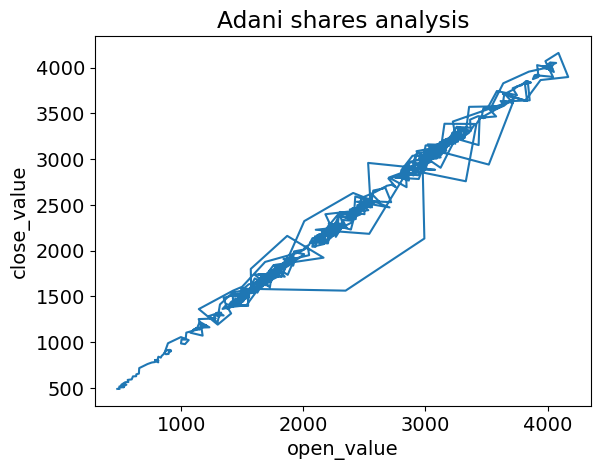

In [134]:
#EDA

plt.plot(df1['Open'],df1['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title("Adani shares analysis")
plt.show()


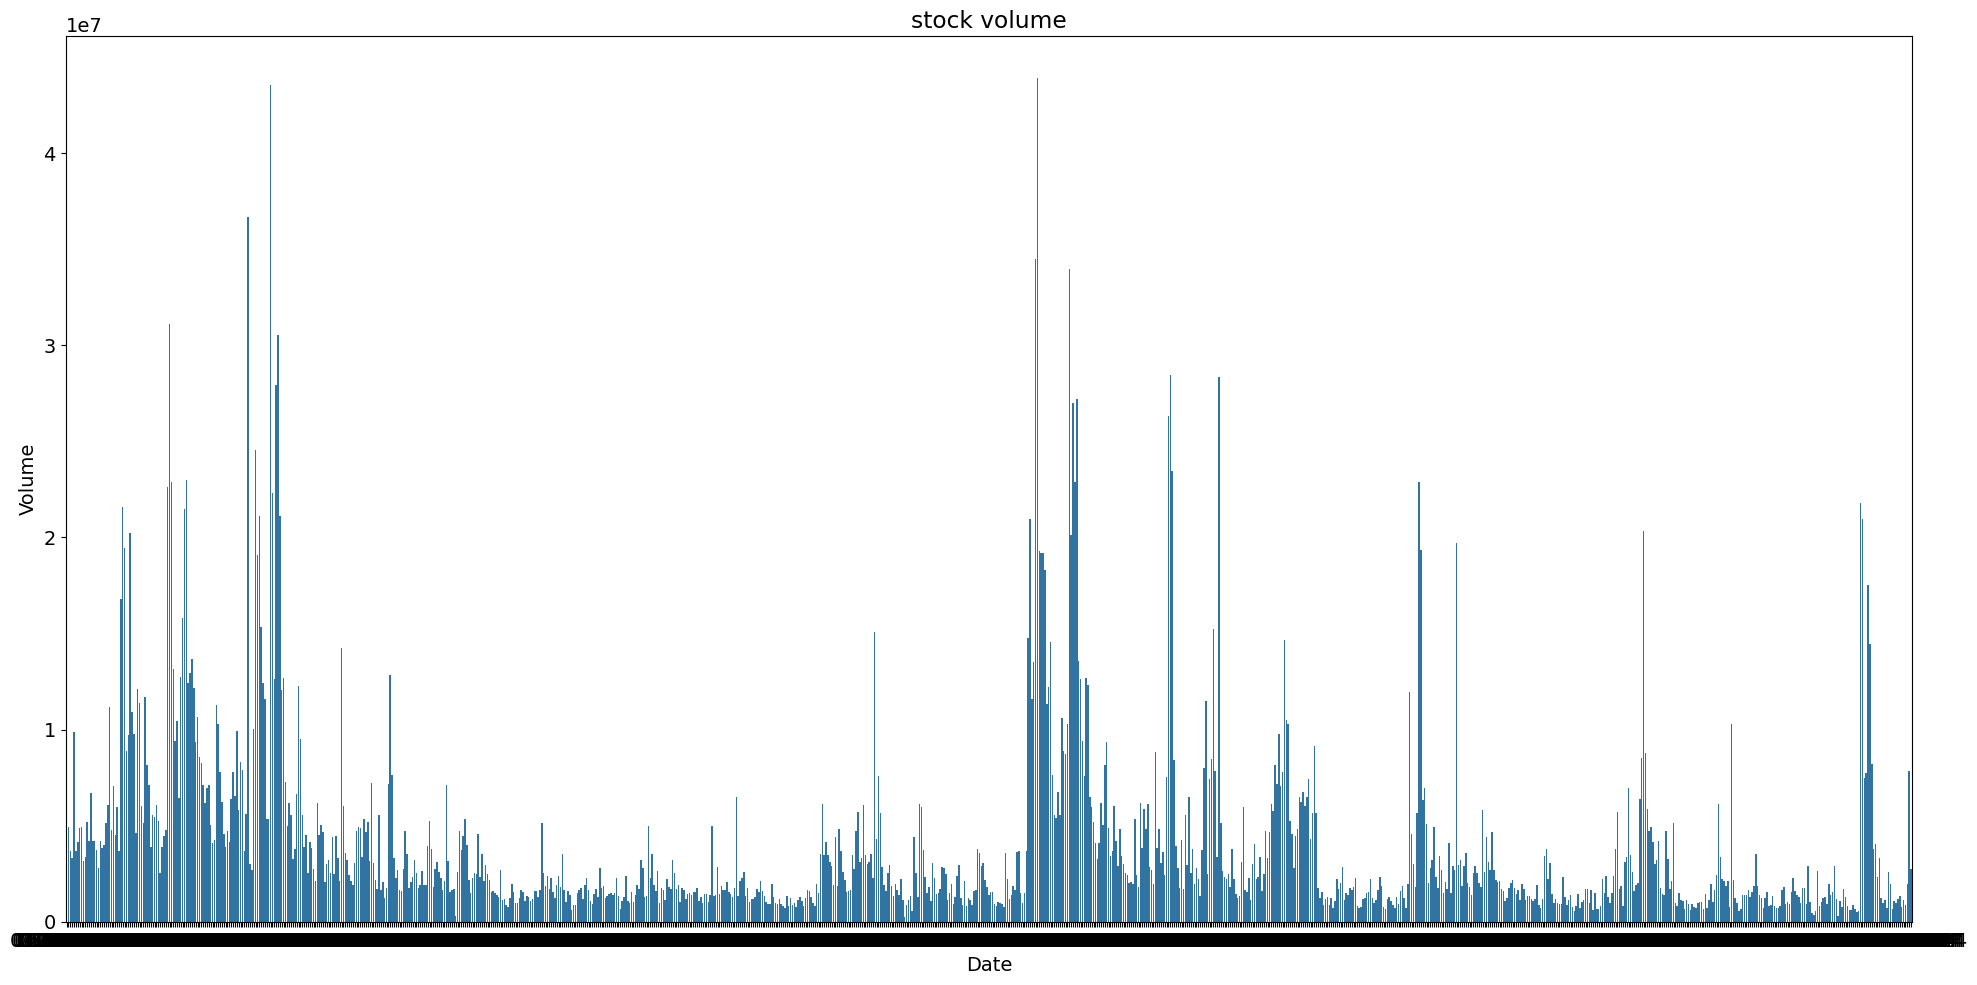

In [136]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df1)
#plt.xticks(rotation=90)
plt.tight_layout()
plt.title('stock volume')

plt.show()

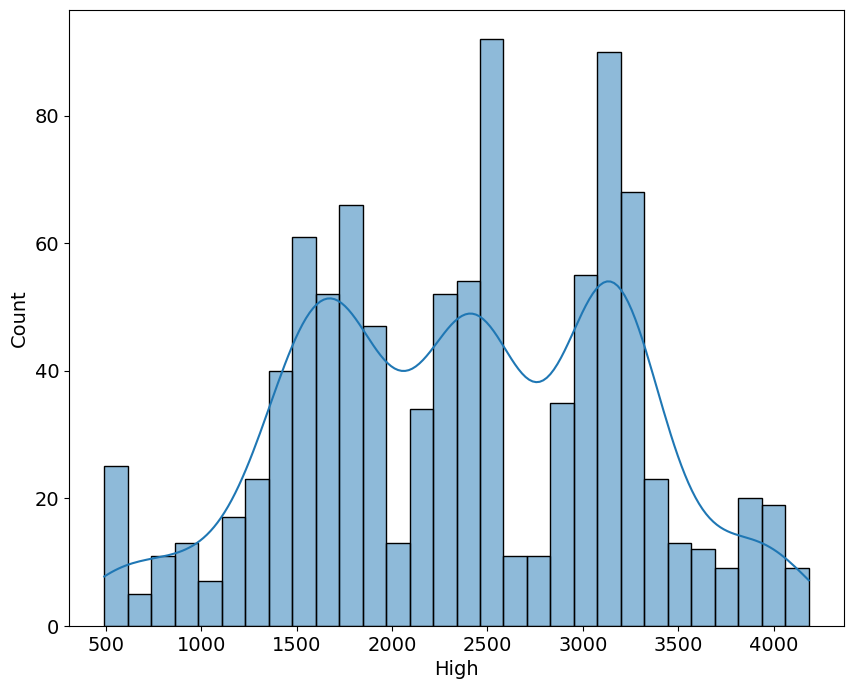

In [137]:
plt.figure(figsize=(10,8))
sns.histplot(df1['High'],bins=30,kde=True)
plt.show()

<Axes: xlabel='Return', ylabel='Count'>

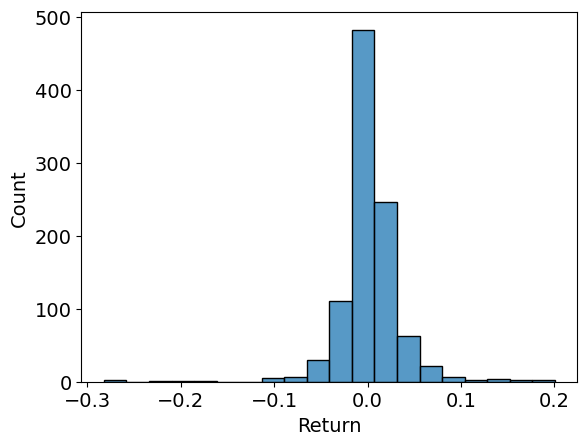

In [139]:
df1['Return']=df1['Close'].pct_change()
sns.histplot(data=df1['Return'],bins=20)


In [140]:
#Feature engineering

In [141]:
mean_val=df1['Volume'].mean()
print(f"The mean value of Stock prices is{mean_val}")

The mean value of Stock prices is4142064.4113475177


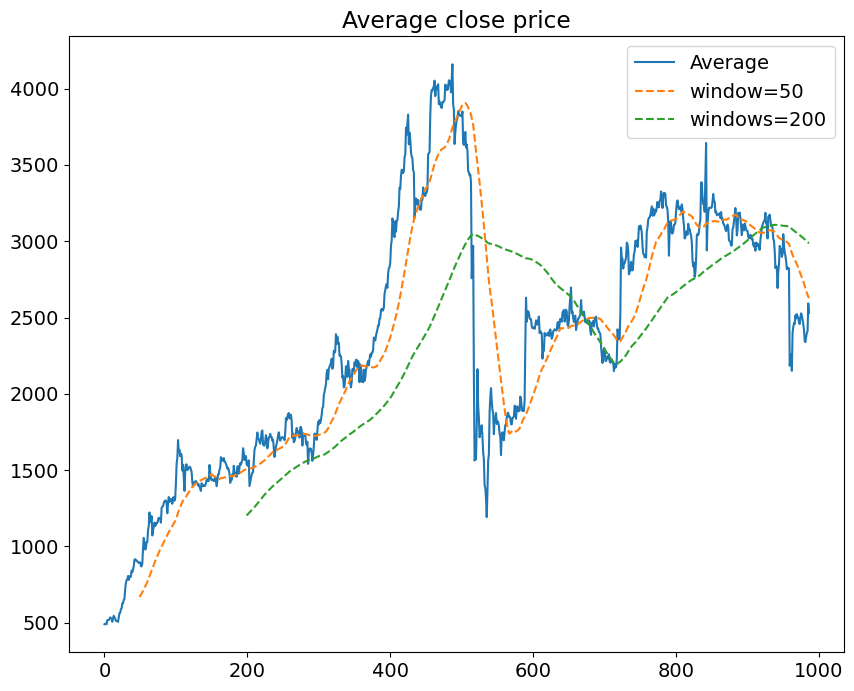

In [142]:

df1['sma'] = df1['Close'].rolling(window=50).mean()
df1['sml'] = df1['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df1['Close'],label='Average')
plt.plot(df1['sma'],label='window=50',linestyle='--')
plt.plot(df1['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()



In [330]:
df1.sort_values(by='Close',ascending=False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
487,20-12-2022,4159.459961,4166.150762,4060.698718,4089.258718,3778426,ADANIENT.NS,0.022084,3744.994072,2796.555020
486,19-12-2022,4069.586426,4098.246139,3965.881927,3982.408773,1643404,ADANIENT.NS,0.023739,3727.264971,2783.964953
482,13-12-2022,4054.507568,4066.291074,4005.975852,4022.153091,1215308,ADANIENT.NS,0.010830,3666.951645,2735.835673
462,15-11-2022,4052.110840,4059.300696,4016.360984,4019.406757,1065546,ADANIENT.NS,0.008763,3507.994824,2512.731252
483,14-12-2022,4050.113770,4086.312947,4034.335873,4070.285400,1114492,ADANIENT.NS,-0.001084,3678.935820,2747.762971
...,...,...,...,...,...,...,...,...,...,...
19,29-01-2021,505.389221,523.893079,501.249554,513.917963,3822560,ADANIENT.NS,-0.010159,NaN,NaN
1,04-01-2021,493.269440,501.349289,485.438968,490.775661,4936582,ADANIENT.NS,0.006821,NaN,NaN
2,05-01-2021,493.169678,500.152258,488.381635,490.775656,3654033,ADANIENT.NS,-0.000202,NaN,NaN
0,01-01-2021,489.927765,492.022545,475.812983,475.812983,5035248,ADANIENT.NS,NaN,NaN,NaN


In [144]:
# BHARATIAIRTEL

In [145]:
df2=pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\Bharti_Airtel_stock_data.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    987 non-null    object 
 1   Close   987 non-null    float64
 2   High    987 non-null    float64
 3   Low     987 non-null    float64
 4   Open    987 non-null    float64
 5   Volume  987 non-null    int64  
 6   Ticker  987 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 54.1+ KB


In [152]:
# Data cleaning

In [157]:
df2.drop_duplicates()
df2.dropna()

,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,498.339722,499.548927,491.616502,495.534352,10377082,Bharati Airtel
1,04-01-2021,500.226074,503.515126,494.905539,500.129320,13489114,Bharati Airtel
2,05-01-2021,497.227264,500.032634,494.421895,497.227264,10689423,Bharati Airtel
3,06-01-2021,508.158508,514.398016,496.356594,498.194599,30837593,Bharati Airtel
4,07-01-2021,527.457519,536.357310,509.899749,514.639908,39444841,Bharati Airtel
...,...,...,...,...,...,...,...
982,24-12-2024,1583.900024,1598.800049,1575.000000,1590.000000,3610076,Bharati Airtel
983,26-12-2024,1599.500000,1606.849976,1581.099976,1583.900024,3400479,Bharati Airtel
984,27-12-2024,1599.849976,1628.449951,1596.300049,1599.500000,2559578,Bharati Airtel
985,30-12-2024,1586.900024,1613.050049,1581.099976,1605.000000,4438130,Bharati Airtel


In [159]:
#EDA

In [161]:
Avg_val=df2['Volume'].mean()
print(f"The average value is {Avg_val}")

The average value is 8710252.596757852


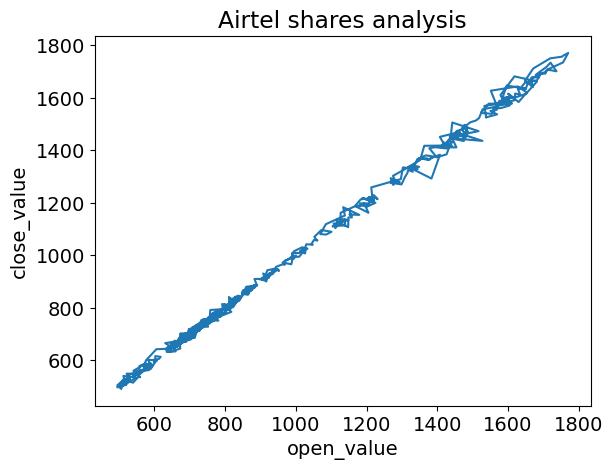

In [163]:
#Visualization 

plt.plot(df2['Open'],df2['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title("Airtel shares analysis")
plt.show()

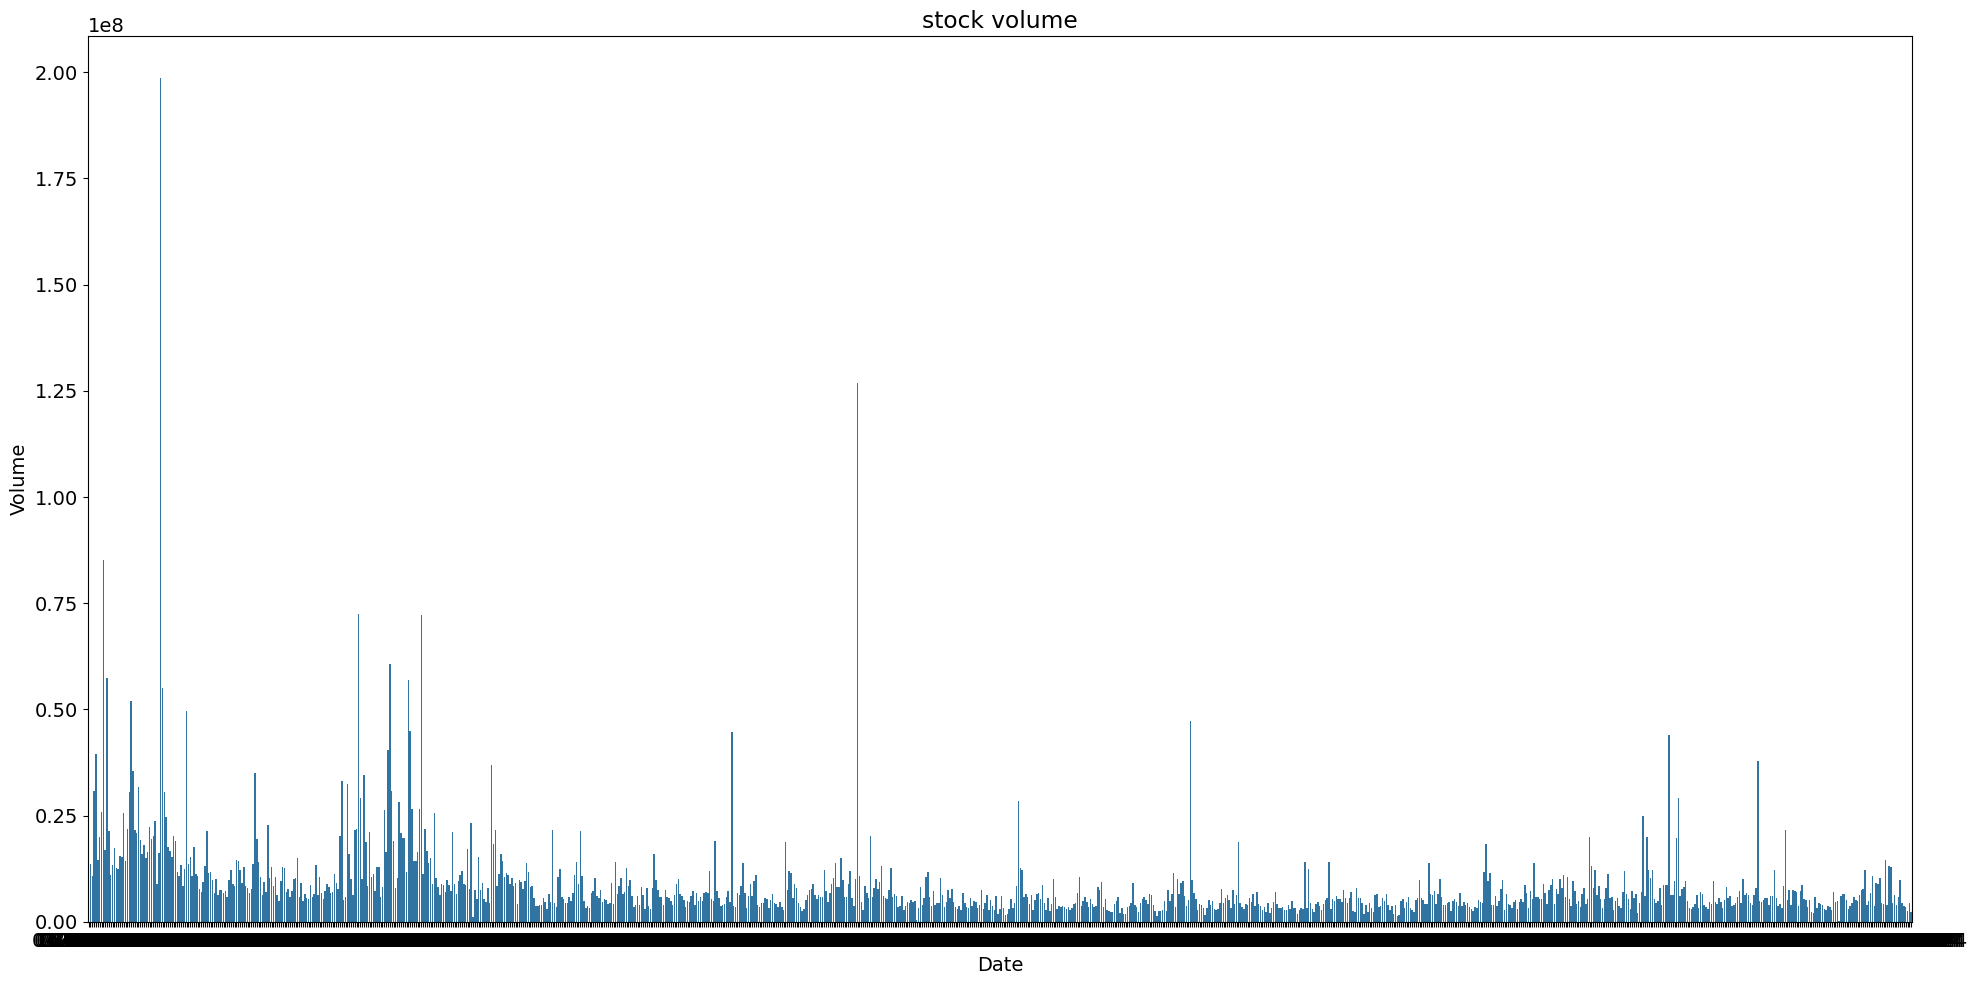

In [165]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df2)
#plt.xticks(rotation=90)
plt.tight_layout()
plt.title('stock volume')


plt.show()

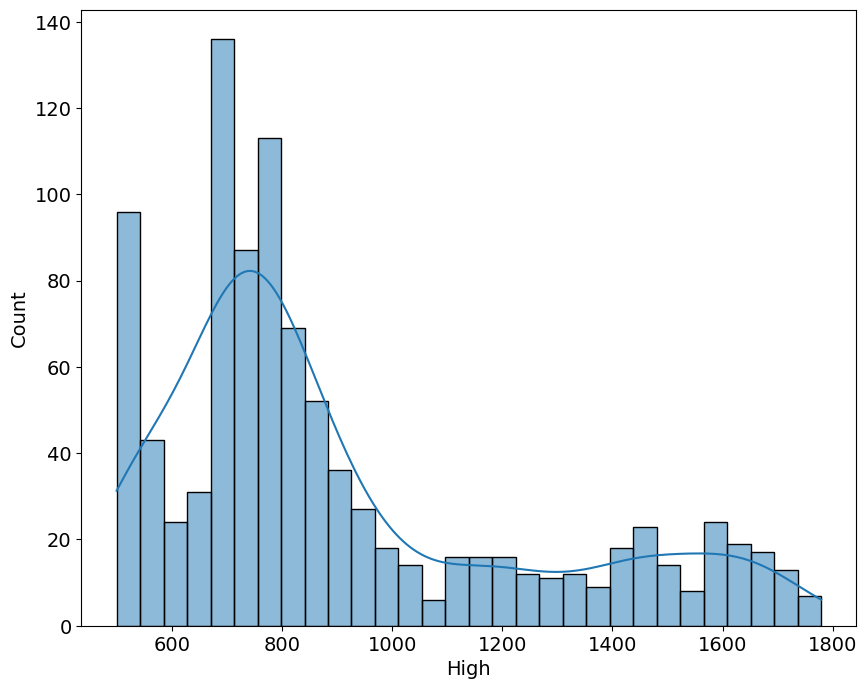

In [166]:
plt.figure(figsize=(10,8))
sns.histplot(df2['High'],bins=30,kde=True)
plt.show()

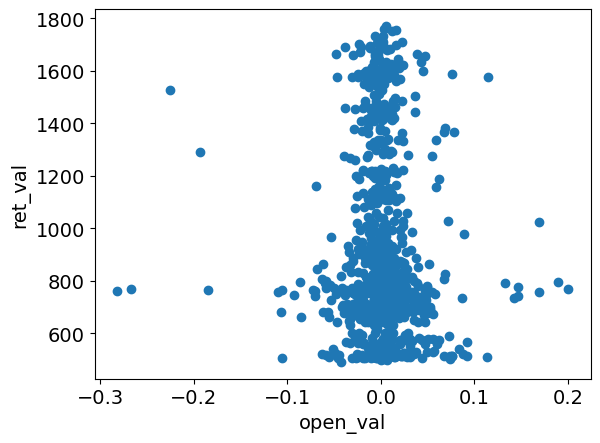

In [169]:
df2['Return']=df1['Close'].pct_change()
plt.scatter(df2['Return'],df2['Close'])
plt.xlabel('open_val')
plt.ylabel('ret_val')
plt.show()


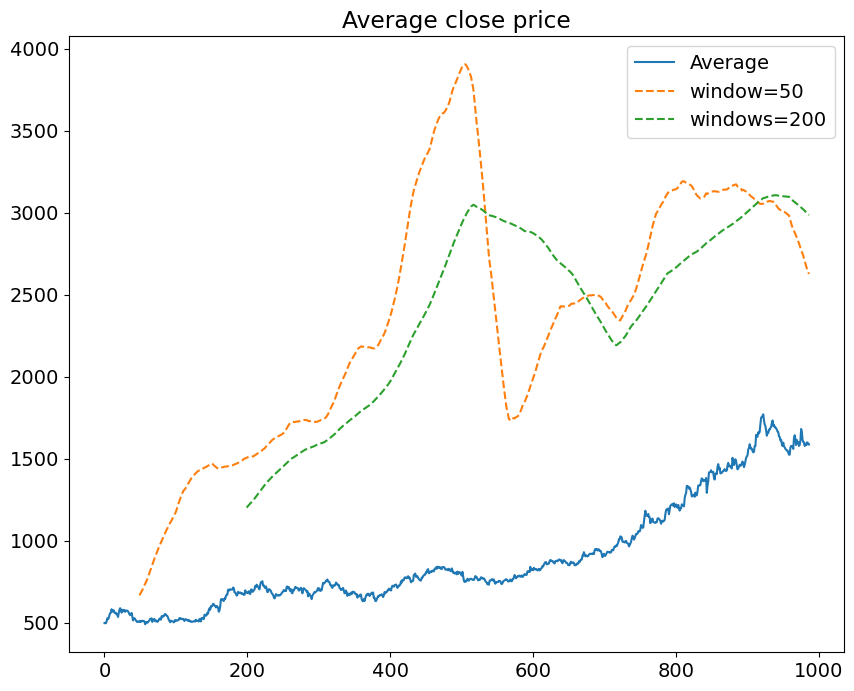

In [171]:
df2['sma'] = df1['Close'].rolling(window=50).mean()
df2['sml'] = df1['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df2['Close'],label='Average')
plt.plot(df2['sma'],label='window=50',linestyle='--')
plt.plot(df2['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()


In [173]:
df2.sort_values(by='Close',ascending=False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
922,26-09-2024,1771.099976,1779.000000,1746.150024,1770.000000,7417423,Bharati Airtel,0.005652,3055.198999,3089.439332
921,25-09-2024,1760.400024,1766.900024,1745.000000,1755.550049,4017103,Bharati Airtel,0.003620,3054.932002,3086.476981
920,24-09-2024,1756.650024,1767.550049,1746.099976,1752.000000,7579205,Bharati Airtel,0.016410,3054.637998,3082.760219
919,23-09-2024,1750.449951,1754.250000,1719.000000,1719.000000,5001827,Bharati Airtel,0.011783,3054.068999,3079.078716
923,27-09-2024,1734.599976,1763.449951,1722.500000,1755.199951,7116861,Bharati Airtel,0.002450,3055.961001,3090.300046
...,...,...,...,...,...,...,...,...,...,...
60,31-03-2021,500.419586,508.738940,499.403829,505.304802,7712521,Bharati Airtel,-0.000388,767.117298,NaN
1,04-01-2021,500.226074,503.515126,494.905539,500.129320,13489114,Bharati Airtel,0.006821,NaN,NaN
0,01-01-2021,498.339722,499.548927,491.616502,495.534352,10377082,Bharati Airtel,NaN,NaN,NaN
2,05-01-2021,497.227264,500.032634,494.421895,497.227264,10689423,Bharati Airtel,-0.000202,NaN,NaN


In [175]:
df3=pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\HDFC_Bank_stock_data.csv")
df3.describe()

,Close,High,Low,Open,Volume
count,987.000000,987.000000,987.000000,987.000000,9.870000e+02
mean,1514.455468,1527.705031,1501.077491,1514.362035,1.312289e+07
std,121.557602,121.627247,121.873490,122.125485,1.333329e+07
min,1249.707520,1264.435233,1240.246591,1243.562782,5.484040e+05
25%,1426.024597,1438.905221,1413.371312,1426.524259,6.287386e+06
50%,1501.396729,1514.271875,1488.178295,1501.496359,1.016671e+07
75%,1608.707337,1621.493070,1595.836414,1608.317728,1.635945e+07
max,1871.750000,1880.000000,1858.550049,1877.699951,2.226710e+08


In [177]:
# data cleaning

In [179]:
df3.drop_duplicates()
df3.dropna()

,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,1368.017578,1385.249147,1363.745603,1382.369212,4405469,HDFC
1,04-01-2021,1359.329712,1380.449241,1343.010076,1380.449241,7870096,HDFC
2,05-01-2021,1369.601318,1373.489278,1352.609745,1362.401479,7193412,HDFC
3,06-01-2021,1363.697632,1382.369169,1356.545721,1377.569276,11067025,HDFC
4,07-01-2021,1359.569702,1375.265329,1356.017828,1375.169355,9947421,HDFC
...,...,...,...,...,...,...,...
982,24-12-2024,1798.099976,1808.699951,1789.550049,1802.050049,7242917,HDFC
983,26-12-2024,1790.750000,1812.000000,1780.750000,1798.550049,5240839,HDFC
984,27-12-2024,1798.250000,1805.949951,1789.099976,1794.800049,3629665,HDFC
985,30-12-2024,1777.900024,1815.000000,1771.000000,1792.199951,11111109,HDFC


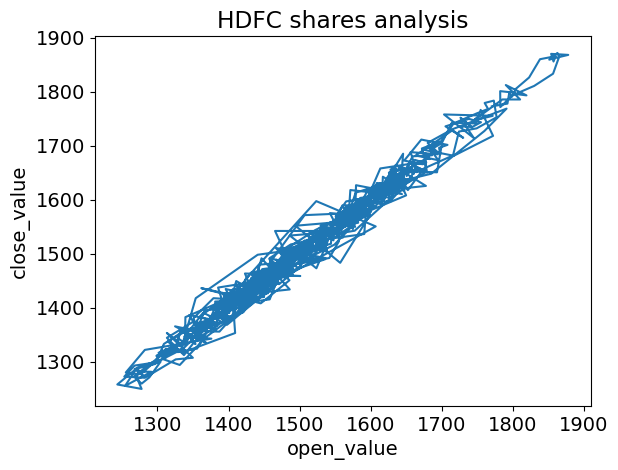

In [181]:
#Visualization

plt.plot(df3['Open'],df3['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title("HDFC shares analysis")
plt.show()

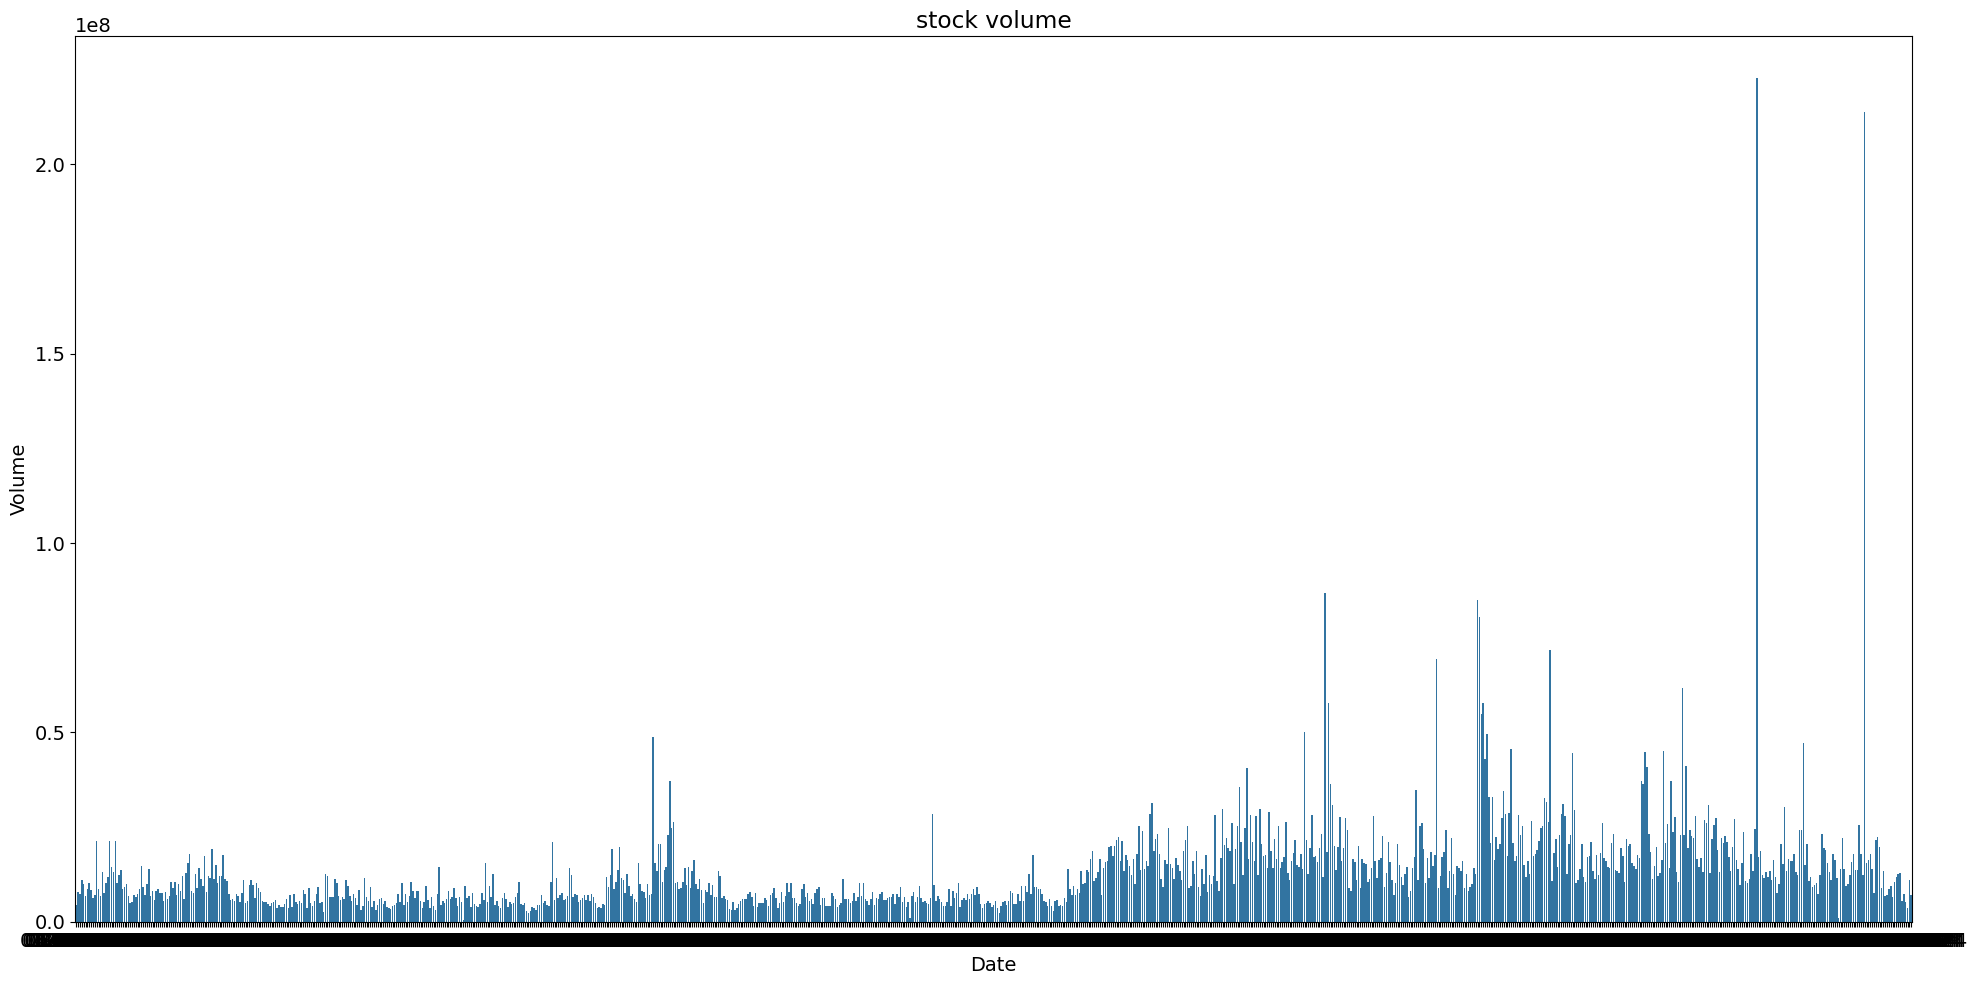

In [204]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df3)


plt.tight_layout()
plt.title('stock volume')

plt.show()




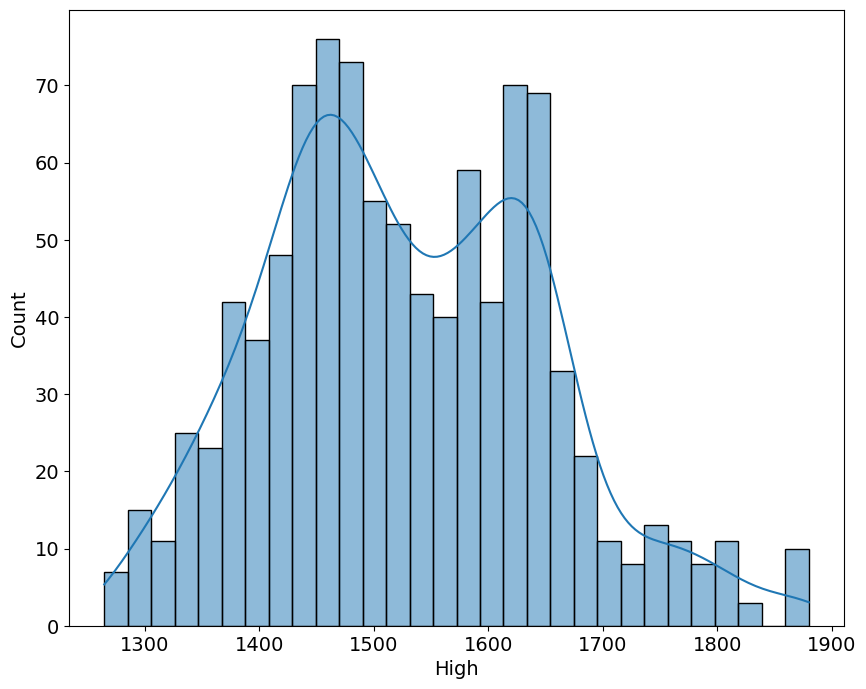

In [186]:
plt.figure(figsize=(10,8))
sns.histplot(df3['High'],bins=30,kde=True)
plt.show()



<Axes: xlabel='Return', ylabel='Count'>

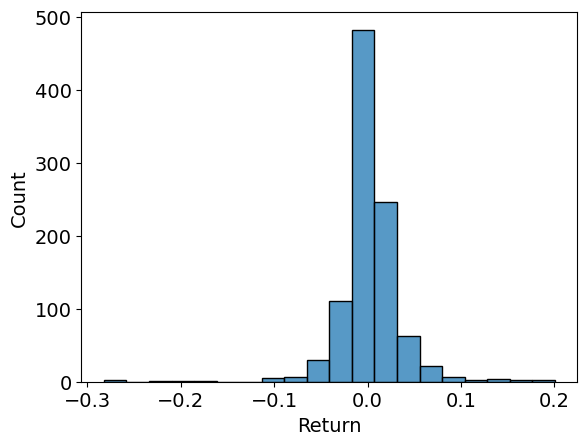

In [188]:
df3['Return']=df1['Close'].pct_change()
sns.histplot(data=df3['Return'],bins=20)



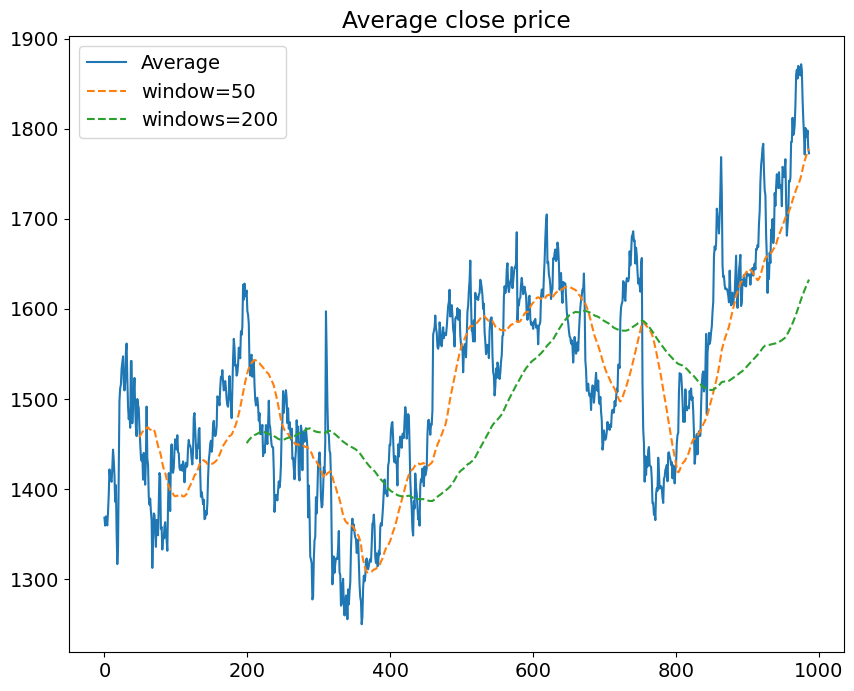

In [190]:

df3['sma'] = df3['Close'].rolling(window=50).mean()
df3['sml'] = df3['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df3['Close'],label='Average')
plt.plot(df3['sma'],label='window=50',linestyle='--')
plt.plot(df3['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()

In [206]:
Mean_val3 = df3['Volume'].mean()
print(f"The mean value is {Mean_val3:.2f}")

The mean value is 13122894.28


In [194]:
df3.sort_values(by='Close',ascending=False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
975,13-12-2024,1871.750000,1875.000000,1829.250000,1862.500000,9504501,HDFC,0.009365,1747.726001,1610.879687
971,09-12-2024,1870.000000,1880.000000,1849.000000,1853.650024,13473956,HDFC,-0.004209,1738.369002,1601.711140
972,10-12-2024,1868.099976,1877.699951,1858.550049,1877.699951,6662740,HDFC,-0.011479,1740.062002,1604.076636
969,05-12-2024,1865.750000,1879.949951,1835.199951,1860.000000,19841357,HDFC,0.011143,1734.795003,1596.787238
976,16-12-2024,1865.199951,1869.949951,1855.250000,1865.099976,6553541,HDFC,-0.005994,1751.390000,1613.106874
...,...,...,...,...,...,...,...,...,...,...
331,06-05-2022,1270.342041,1287.117984,1265.907051,1282.297318,13365634,HDFC,-0.003414,1381.543354,1455.049607
336,13-05-2022,1259.509644,1285.502568,1255.266924,1277.748636,8384119,HDFC,0.004376,1366.596685,1451.328848
361,17-06-2022,1257.949097,1266.971023,1240.246591,1243.562782,7361961,HDFC,0.006145,1325.415898,1435.499529
340,19-05-2022,1255.315796,1264.435233,1246.781541,1254.486659,10268753,HDFC,-0.030421,1361.636096,1449.142162


In [208]:
#icici bank

In [214]:
df4= pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\ICICI_Bank_stock_data.csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    987 non-null    object 
 1   Close   987 non-null    float64
 2   High    987 non-null    float64
 3   Low     987 non-null    float64
 4   Open    987 non-null    float64
 5   Volume  987 non-null    int64  
 6   Ticker  987 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 54.1+ KB


In [216]:
# Data cleaning

In [220]:
df4.drop_duplicates()
df4.dropna()

,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,509.912445,519.095702,508.559099,517.694036,13592625,ICICIBANK.NS
1,04-01-2021,513.972412,517.162374,506.819115,514.552384,16549750,ICICIBANK.NS
2,05-01-2021,519.337402,521.947393,505.562516,509.090843,23311516,ICICIBANK.NS
3,06-01-2021,528.472290,532.242223,517.984008,520.787342,28178838,ICICIBANK.NS
4,07-01-2021,523.059021,535.915629,521.754055,533.740647,21138034,ICICIBANK.NS
...,...,...,...,...,...,...,...
982,24-12-2024,1297.250000,1304.500000,1290.250000,1296.800049,7138516,ICICIBANK.NS
983,26-12-2024,1297.349976,1312.750000,1289.199951,1307.000000,7338444,ICICIBANK.NS
984,27-12-2024,1307.550049,1315.949951,1298.550049,1298.550049,4756066,ICICIBANK.NS
985,30-12-2024,1294.650024,1326.500000,1289.449951,1304.949951,14207425,ICICIBANK.NS


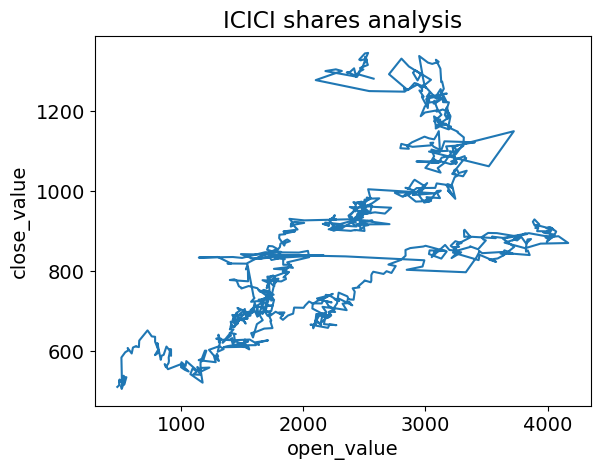

In [222]:
#EDA

plt.plot(df1['Open'],df4['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title("ICICI shares analysis")
plt.show()



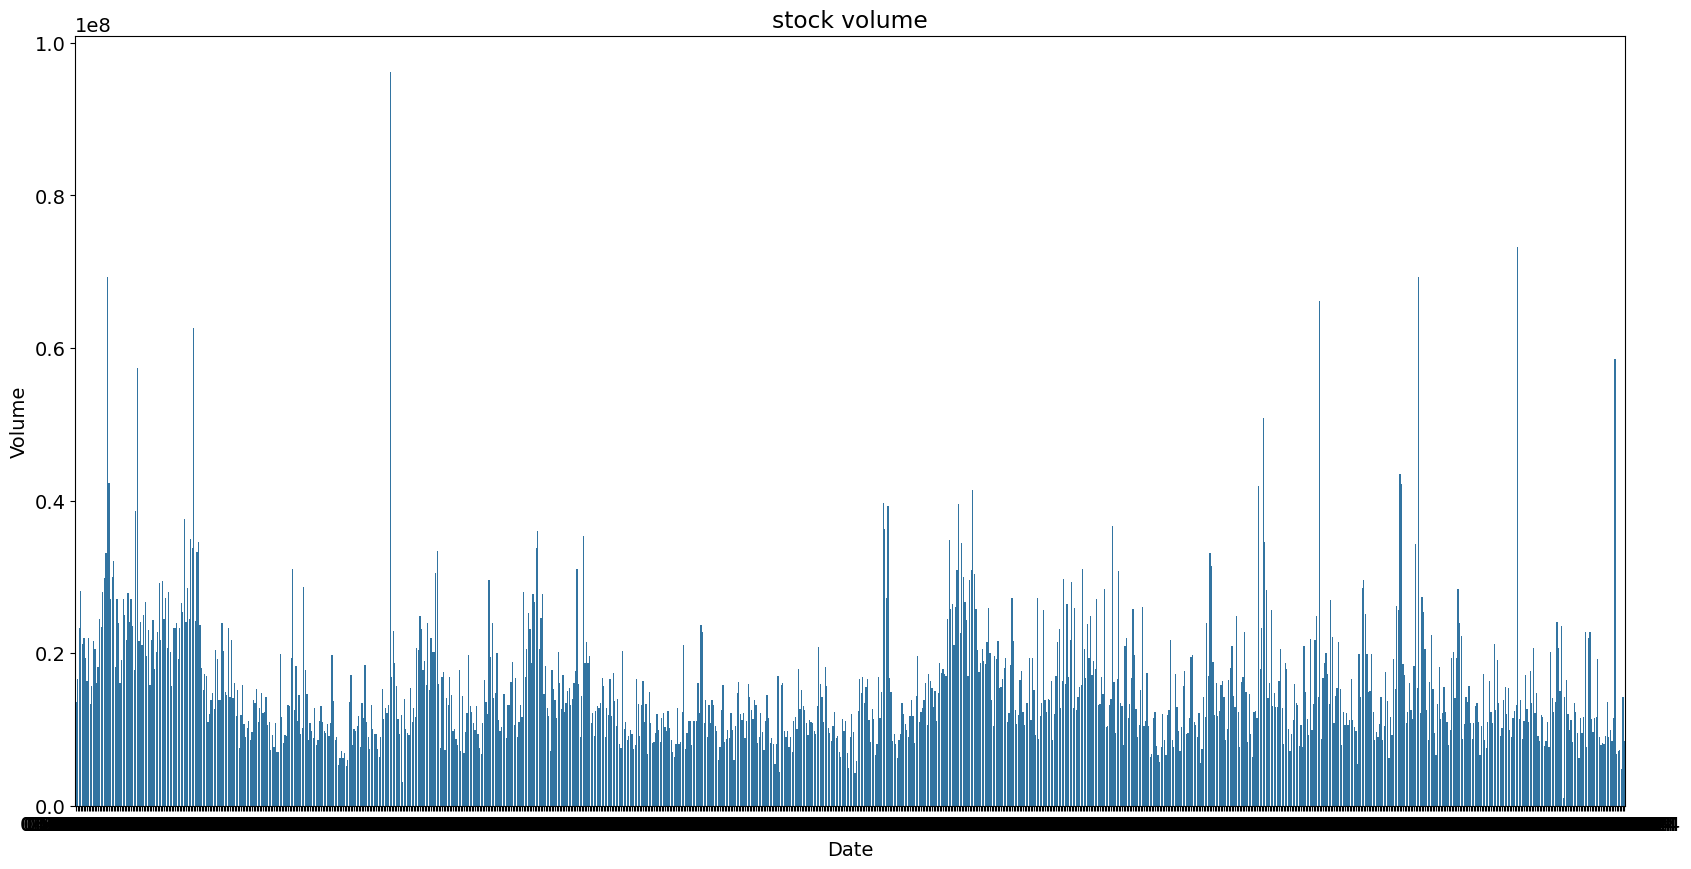

In [224]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df4)

plt.title('stock volume')

plt.show()




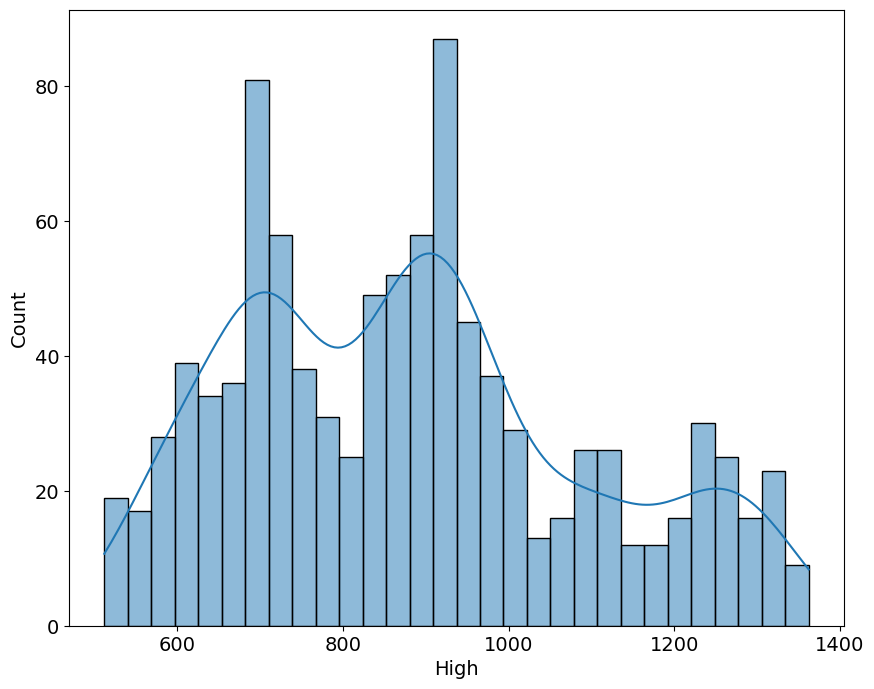

In [226]:
plt.figure(figsize=(10,8))
sns.histplot(df4['High'],bins=30,kde=True)
plt.show()



<Axes: xlabel='Return', ylabel='Count'>

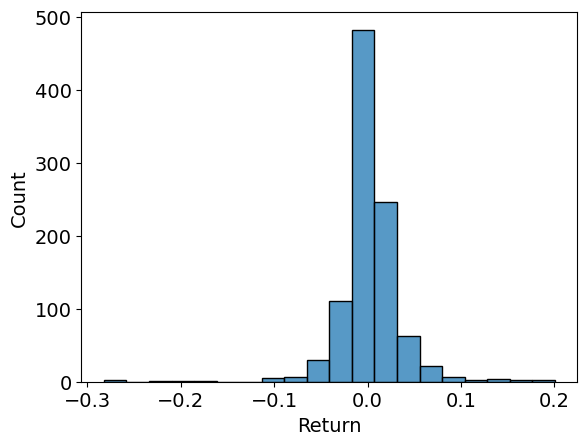

In [228]:
df4['Return']=df1['Close'].pct_change()
sns.histplot(data=df1['Return'],bins=20)



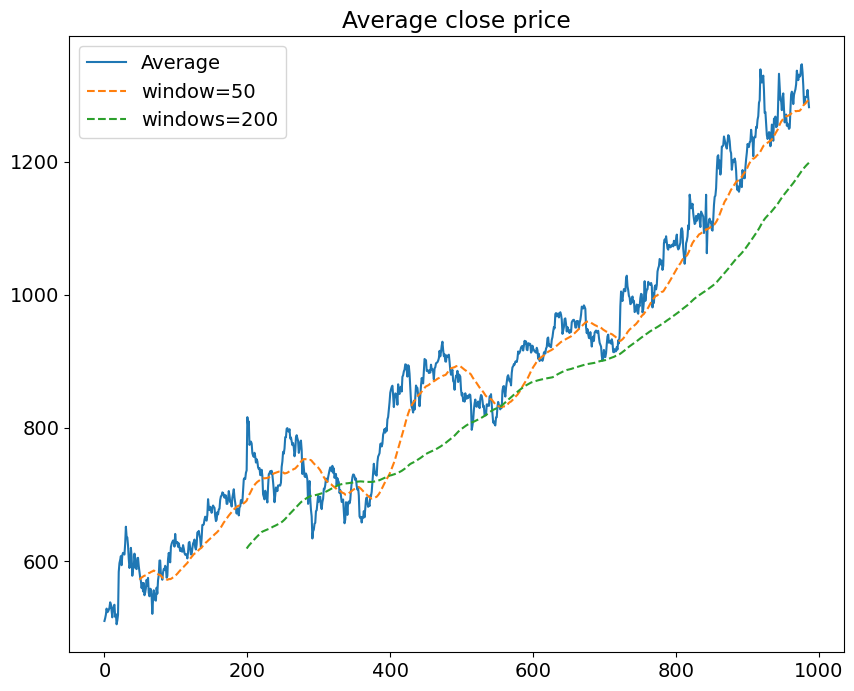

In [230]:
df4['sma'] = df4['Close'].rolling(window=50).mean()
df4['sml'] = df4['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df4['Close'],label='Average')
plt.plot(df4['sma'],label='window=50',linestyle='--')
plt.plot(df4['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()

In [234]:
mean_val4=df4['Volume'].mean()
print(f"The mean value is {mean_val4:.2f}")

The mean value is 15583685.56


In [236]:
df4.sort_values(by="Close",ascending= False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
976,16-12-2024,1346.099976,1350.449951,1340.050049,1344.900024,9071006,ICICIBANK.NS,-0.005994,1280.753994,1186.366704
975,13-12-2024,1344.900024,1347.150024,1313.500000,1325.349976,13536684,ICICIBANK.NS,0.009365,1278.958994,1184.851060
918,20-09-2024,1338.449951,1362.349976,1291.550049,1295.000000,73257767,ICICIBANK.NS,0.022204,1215.187275,1103.294600
969,05-12-2024,1336.500000,1342.900024,1308.599976,1316.250000,19210697,ICICIBANK.NS,0.011143,1275.805994,1175.546286
977,17-12-2024,1333.750000,1348.099976,1326.050049,1342.000000,9879257,ICICIBANK.NS,-0.009871,1282.633994,1187.767306
...,...,...,...,...,...,...,...,...,...,...
11,18-01-2021,515.374084,530.115629,511.265785,526.345637,21580313,ICICIBANK.NS,-0.036886,NaN,NaN
1,04-01-2021,513.972412,517.162374,506.819115,514.552384,16549750,ICICIBANK.NS,0.006821,NaN,NaN
18,28-01-2021,510.637421,512.184051,494.929218,497.442507,29836591,ICICIBANK.NS,-0.001853,NaN,NaN
0,01-01-2021,509.912445,519.095702,508.559099,517.694036,13592625,ICICIBANK.NS,NaN,NaN,NaN


In [238]:
#KOTAK BANK

In [240]:
df5 = pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\Kotak_Mahindra_Bank_stock_data.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    987 non-null    object 
 1   Close   987 non-null    float64
 2   High    987 non-null    float64
 3   Low     987 non-null    float64
 4   Open    987 non-null    float64
 5   Volume  987 non-null    int64  
 6   Ticker  987 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 54.1+ KB


In [244]:

df5.drop_duplicates()
df5.dropna()





,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,1988.043579,2001.901612,1984.703573,1990.884970,1106099,KOTAKBANK.NS
1,04-01-2021,1959.629395,1999.907604,1949.111125,1997.963526,3141429,KOTAKBANK.NS
2,05-01-2021,1953.846924,1958.482942,1929.171475,1953.597677,3263230,KOTAKBANK.NS
3,06-01-2021,1964.464722,1973.038792,1942.530991,1967.954179,3452515,KOTAKBANK.NS
4,07-01-2021,1946.518921,1978.023710,1941.633657,1978.023710,3419317,KOTAKBANK.NS
...,...,...,...,...,...,...,...
982,24-12-2024,1749.050049,1754.650024,1738.050049,1742.550049,2712625,KOTAKBANK.NS
983,26-12-2024,1752.800049,1769.449951,1742.050049,1756.800049,1132006,KOTAKBANK.NS
984,27-12-2024,1759.900024,1777.199951,1754.000000,1760.000000,2448271,KOTAKBANK.NS
985,30-12-2024,1740.699951,1781.000000,1733.500000,1765.000000,5502772,KOTAKBANK.NS


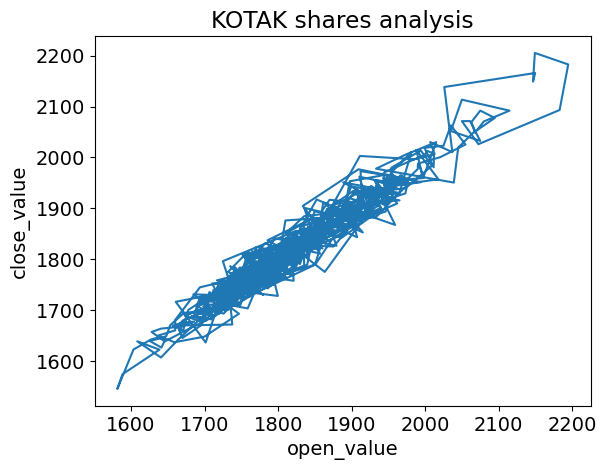

In [250]:
#Visualization

plt.plot(df5['Open'],df5['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title("KOTAK shares analysis")
plt.show()



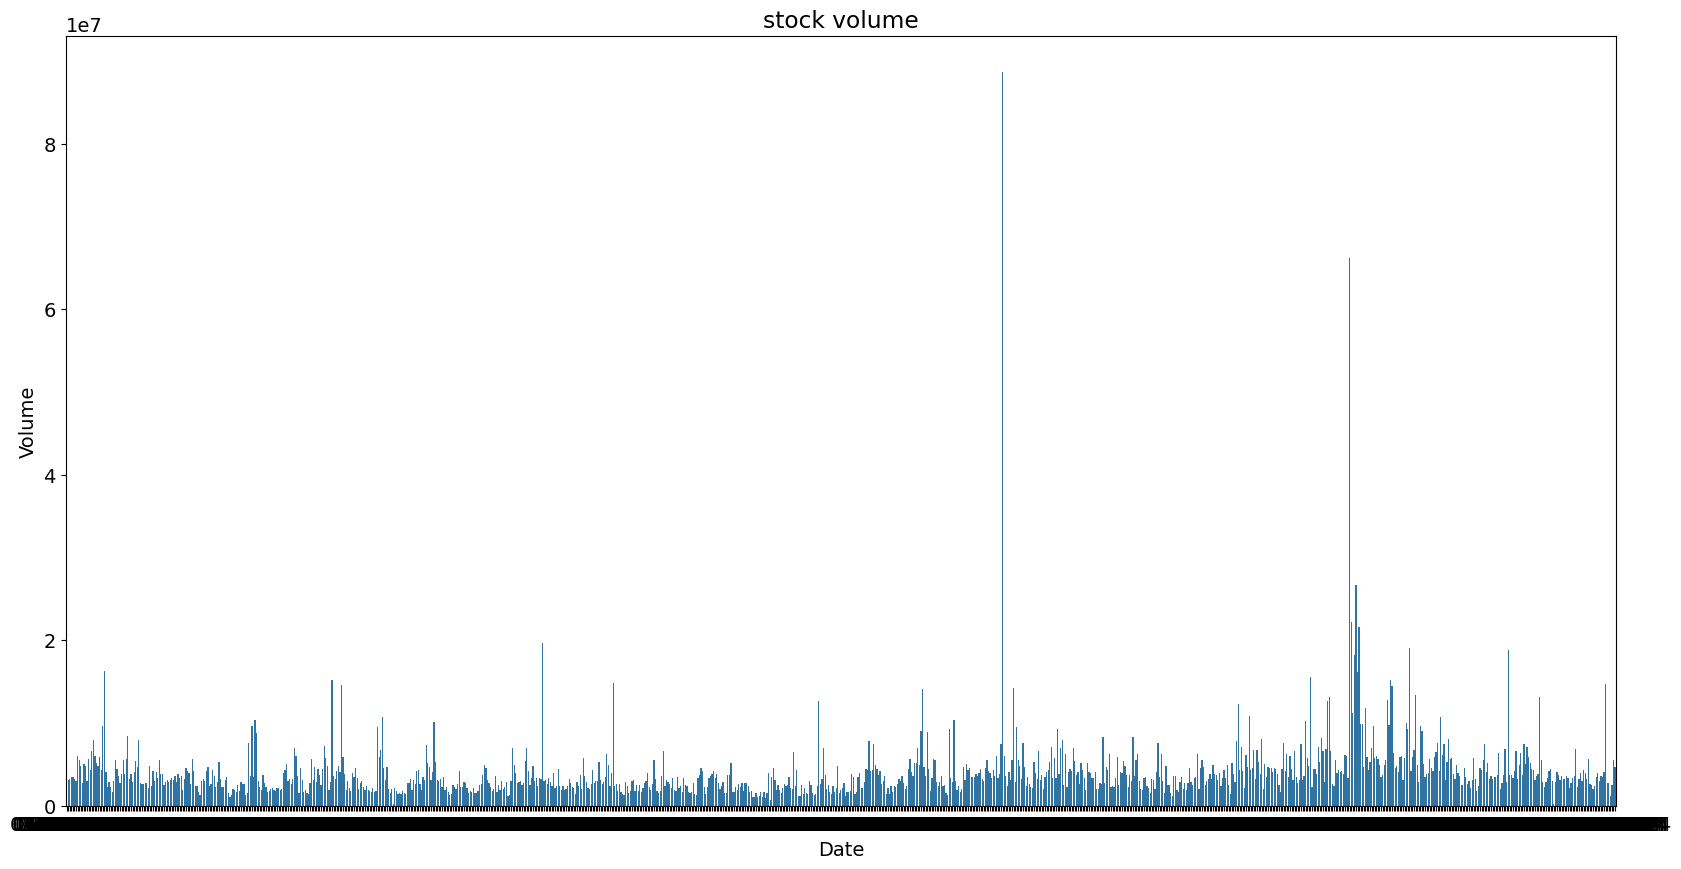

In [248]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df5)
plt.title('stock volume')
plt.show()



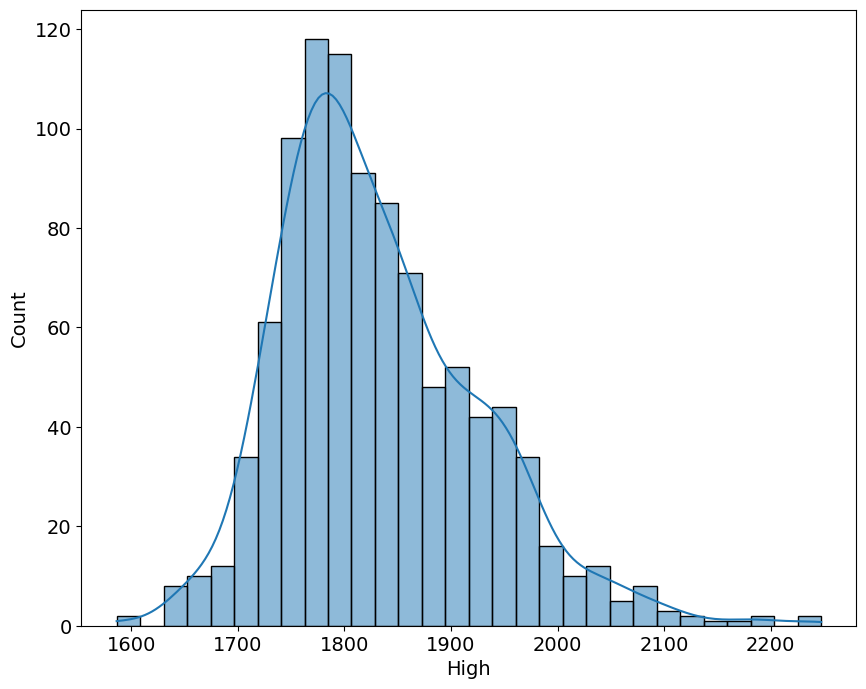

In [252]:
plt.figure(figsize=(10,8))
sns.histplot(df5['High'],bins=30,kde=True)
plt.show()



<Axes: xlabel='Return', ylabel='Count'>

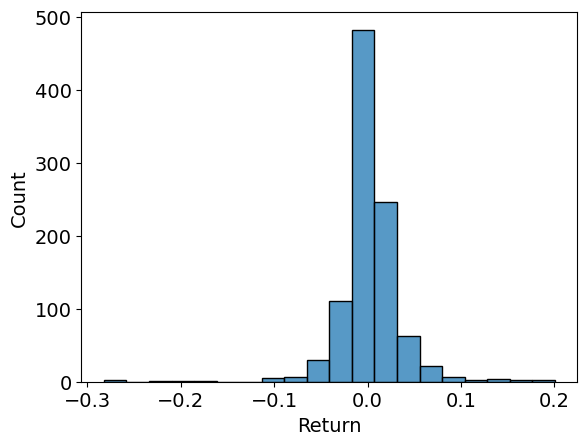

In [254]:
df5['Return']=df1['Close'].pct_change()
sns.histplot(data=df5['Return'],bins=20)



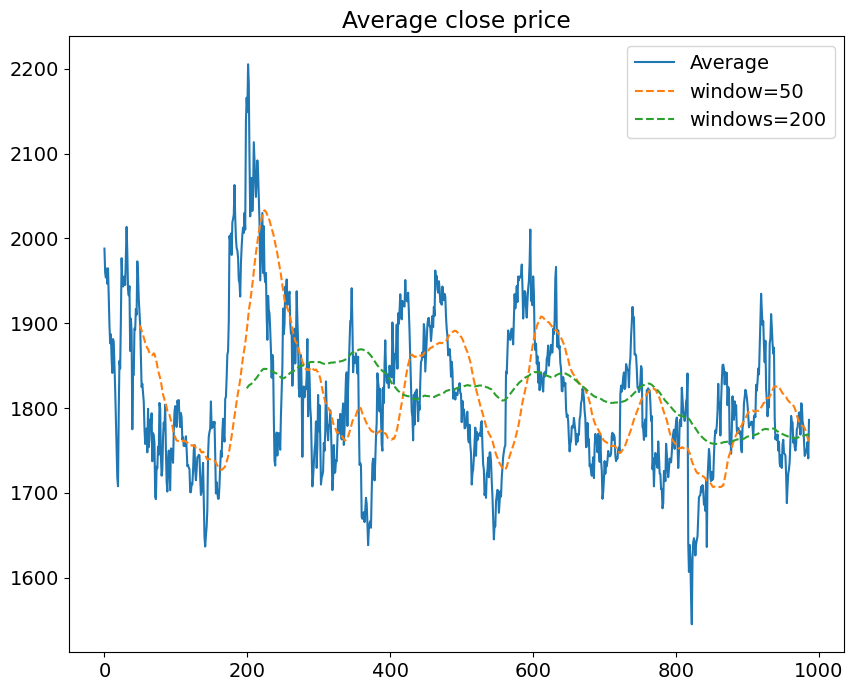

In [256]:
df5['sma'] = df5['Close'].rolling(window=50).mean()
df5['sml'] = df5['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df5['Close'],label='Average')
plt.plot(df5['sma'],label='window=50',linestyle='--')
plt.plot(df5['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()

In [260]:
Mean_val5=df5['Volume'].mean()
print(f"the mean value of shares is {Mean_val5:.2f}")

the mean value of shares is 4102315.88


In [262]:
df5.sort_values(by='Close',ascending=False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
201,26-10-2021,2205.384521,2234.361445,2118.354148,2149.076667,10669001,KOTAKBANK.NS,0.007603,1906.246592,1825.401971
202,27-10-2021,2182.741943,2247.328961,2171.121365,2194.462367,4550568,KOTAKBANK.NS,0.014704,1914.231443,1826.546447
199,22-10-2021,2165.934082,2196.107937,2117.406641,2149.475616,5931826,KOTAKBANK.NS,-0.032632,1890.343721,1823.368029
200,25-10-2021,2149.076904,2177.455244,2109.726253,2146.583197,6777262,KOTAKBANK.NS,-0.006999,1897.802900,1824.173196
198,21-10-2021,2138.353760,2149.575441,2016.910228,2025.887574,9495518,KOTAKBANK.NS,0.003365,1883.180801,NaN
...,...,...,...,...,...,...,...,...,...,...
823,06-05-2024,1622.521729,1631.212155,1592.254853,1603.242810,21608211,KOTAKBANK.NS,-0.039623,1735.083323,1780.720184
820,30-04-2024,1622.171997,1645.196810,1618.226370,1638.604060,18206448,KOTAKBANK.NS,-0.008601,1744.608882,1784.947775
818,26-04-2024,1606.739014,1653.188105,1603.242845,1640.651796,22146849,KOTAKBANK.NS,-0.011187,1748.251890,1787.240931
821,02-05-2024,1573.924927,1592.754264,1550.700382,1588.259191,26640478,KOTAKBANK.NS,-0.004943,1741.146677,1783.448890


In [264]:
#Reliance  industires

In [266]:
df6=pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\Reliance_Industries_stock_data.csv")
df6.describe()

,Close,High,Low,Open,Volume
count,987.000000,987.000000,987.000000,987.000000,9.870000e+02
mean,1176.411533,1188.081958,1165.608999,1177.093009,1.464414e+07
std,173.158080,174.089164,172.225201,173.085327,8.411990e+06
min,827.124817,855.437267,821.758658,834.960677,1.705656e+06
25%,1075.187683,1087.257744,1065.921922,1074.551304,9.401644e+06
50%,1158.108521,1168.256382,1148.204452,1158.358865,1.249607e+07
75%,1262.312134,1275.391211,1249.407870,1261.371147,1.722693e+07
max,1590.069946,1597.916527,1574.774022,1593.595776,9.146198e+07


In [268]:
df6.drop_duplicates()
df6.dropna()




,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,892.483887,896.749816,890.014101,892.708375,10015175,RELIANCE.NS
1,04-01-2021,893.988159,897.602954,883.727385,895.896606,24513534,RELIANCE.NS
2,05-01-2021,882.874207,890.732541,878.338773,884.176416,24123091,RELIANCE.NS
3,06-01-2021,859.591065,882.829276,855.504726,882.784378,46401468,RELIANCE.NS
4,07-01-2021,858.198975,873.399261,855.504701,862.397557,32325918,RELIANCE.NS
...,...,...,...,...,...,...,...
982,24-12-2024,1222.750000,1233.550049,1221.000000,1222.300049,6734917,RELIANCE.NS
983,26-12-2024,1216.550049,1227.699951,1214.250000,1224.250000,10016178,RELIANCE.NS
984,27-12-2024,1221.050049,1227.900024,1217.000000,1218.300049,7000397,RELIANCE.NS
985,30-12-2024,1210.699951,1223.199951,1208.099976,1216.400024,8818766,RELIANCE.NS


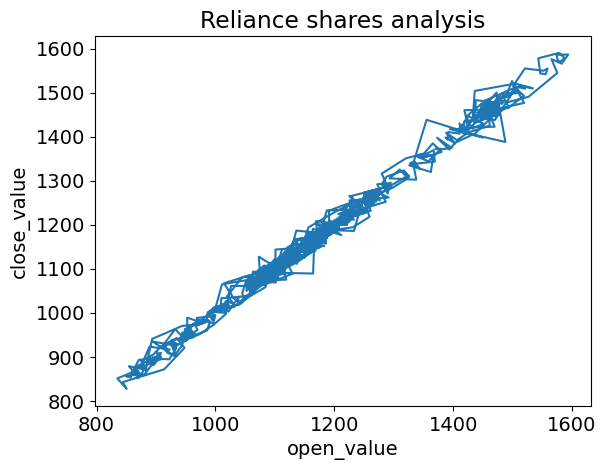

In [270]:
#Visualization

plt.plot(df6['Open'],df6['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title("Reliance shares analysis")
plt.show()



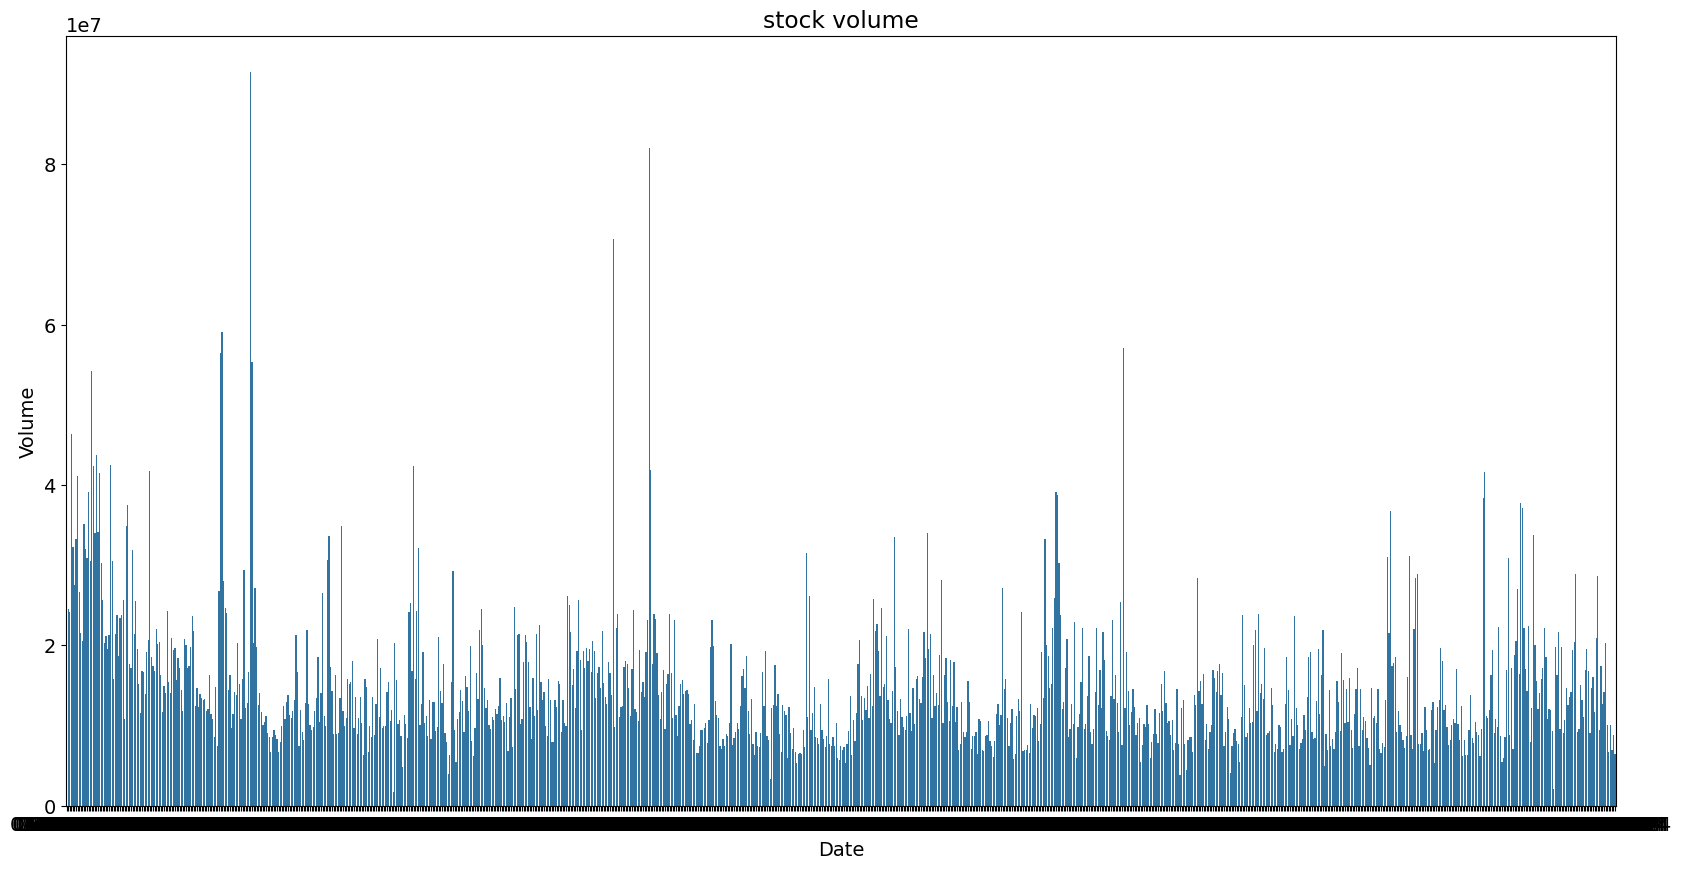

In [272]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df6)
plt.title('stock volume')
plt.show()



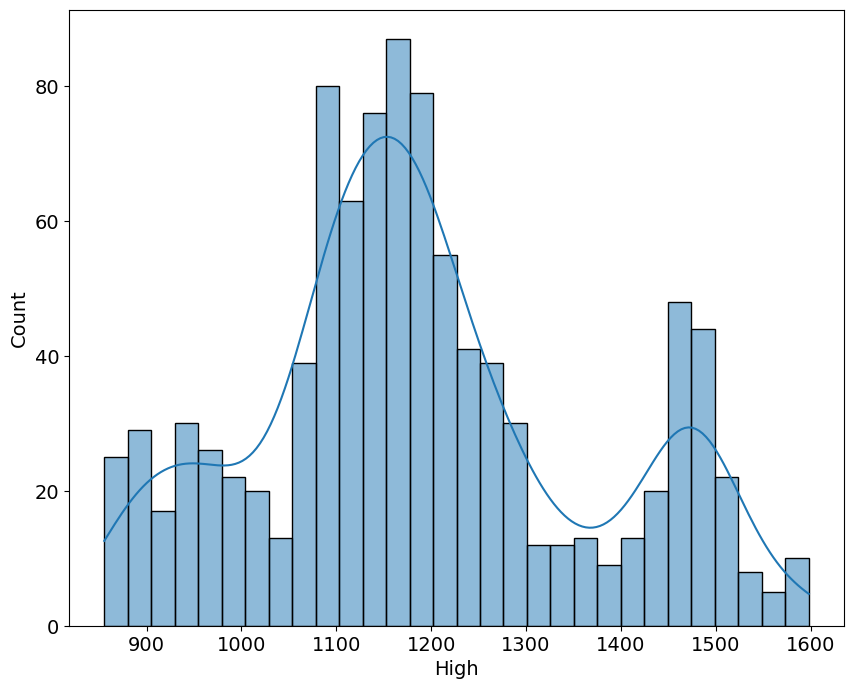

In [274]:
plt.figure(figsize=(10,8))
sns.histplot(df6['High'],bins=30,kde=True)
plt.show()


<Axes: xlabel='Return', ylabel='Count'>

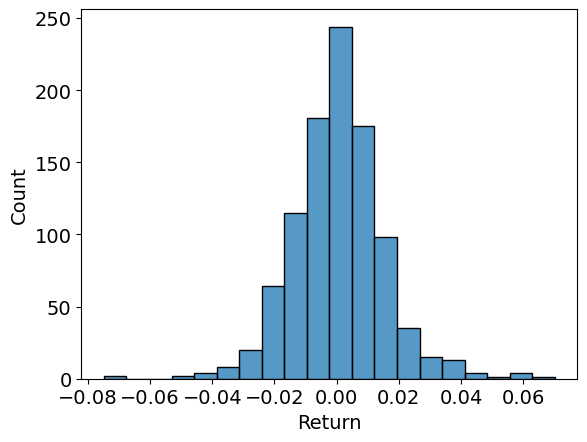

In [276]:

df6['Return']=df6['Close'].pct_change()
sns.histplot(data=df6['Return'],bins=20)


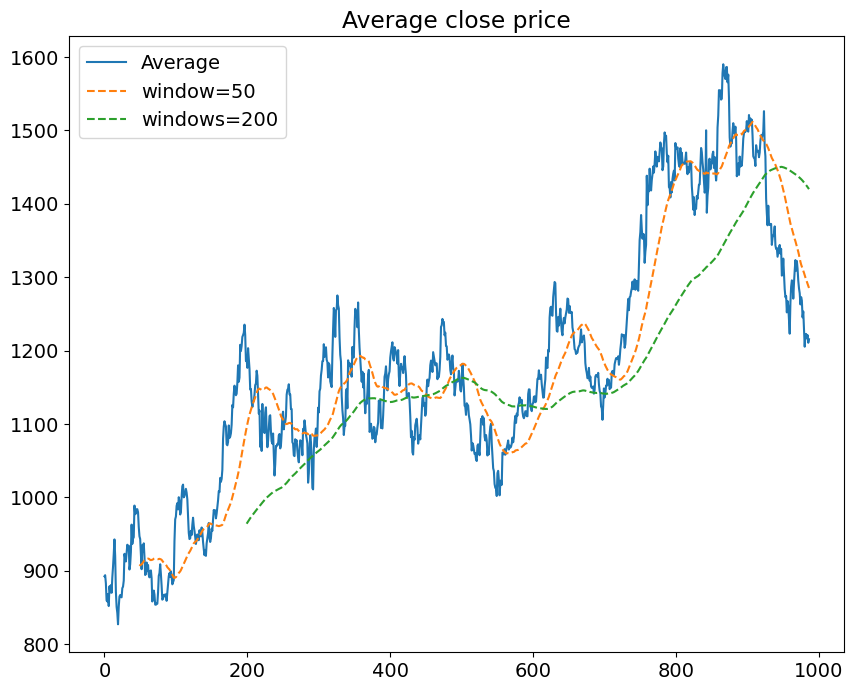

In [278]:

df6['sma'] = df6['Close'].rolling(window=50).mean()
df6['sml'] = df6['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df6['Close'],label='Average')
plt.plot(df6['sma'],label='window=50',linestyle='--')
plt.plot(df6['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()

In [280]:
df6.sort_values(by="Close",ascending=False)


,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
866,08-07-2024,1590.069946,1597.916527,1571.819253,1578.250425,9500806,RELIANCE.NS,0.007727,1456.607429,1343.669899
871,15-07-2024,1586.419678,1594.986329,1574.774022,1593.595776,5329688,RELIANCE.NS,0.000313,1469.281106,1352.665007
870,12-07-2024,1585.923096,1594.291149,1563.848473,1573.780822,12924784,RELIANCE.NS,0.010170,1466.685288,1350.835965
867,09-07-2024,1579.516846,1589.672650,1569.807949,1586.792244,6960002,RELIANCE.NS,-0.006637,1459.195801,1345.422835
865,05-07-2024,1577.877930,1587.686125,1537.527758,1543.313304,12269710,RELIANCE.NS,0.022265,1453.613323,1341.798644
...,...,...,...,...,...,...,...,...,...,...
6,11-01-2021,851.957153,870.615091,849.824159,870.615091,33307825,RELIANCE.NS,-0.018850,NaN,NaN
20,01-02-2021,851.081543,855.437267,829.841515,834.960677,34180952,RELIANCE.NS,0.028964,NaN,NaN
17,27-01-2021,850.946838,864.418328,847.803528,864.418328,42370131,RELIANCE.NS,-0.023699,NaN,NaN
18,28-01-2021,842.661865,863.654896,839.720595,844.278418,34067814,RELIANCE.NS,-0.009736,NaN,NaN


In [282]:
mean_val6=df6['Volume'].mean()
print(f"The mean value of the stock is {mean_val6:.2f}")

The mean value of the stock is 14644143.57


In [284]:
#TCS


In [286]:
df7=pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\Tata_Consultancy_Services_stock_data.csv")
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    987 non-null    object 
 1   Close   987 non-null    float64
 2   High    987 non-null    float64
 3   Low     987 non-null    float64
 4   Open    987 non-null    float64
 5   Volume  987 non-null    int64  
 6   Ticker  987 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 54.1+ KB


In [288]:
df7.drop_duplicates()
df7.dropna()





,Date,Close,High,Low,Open,Volume,Ticker
0,01-01-2021,2713.368164,2724.255922,2667.732244,2668.658862,2681440,TCS.NS
1,04-01-2021,2816.407471,2826.878294,2725.135648,2733.521582,5113293,TCS.NS
2,05-01-2021,2866.027832,2885.718453,2816.546550,2816.546550,5801309,TCS.NS
3,06-01-2021,2827.573730,2885.024024,2814.323053,2872.514686,3726716,TCS.NS
4,07-01-2021,2810.245605,2854.769622,2780.084161,2849.348819,3717827,TCS.NS
...,...,...,...,...,...,...,...
982,24-12-2024,4169.563477,4207.971945,4148.413684,4148.413684,1181886,TCS.NS
983,26-12-2024,4159.188477,4189.965231,4133.299975,4169.563654,1208464,TCS.NS
984,27-12-2024,4154.948730,4171.010552,4137.390475,4153.103031,858100,TCS.NS
985,30-12-2024,4148.912598,4189.316312,4102.224056,4141.131336,1527169,TCS.NS


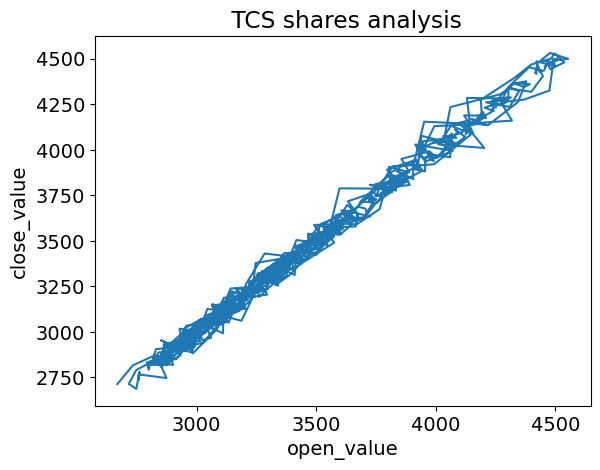

In [290]:
#Visualization

plt.plot(df7['Open'],df7['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title(" TCS shares analysis")
plt.show()



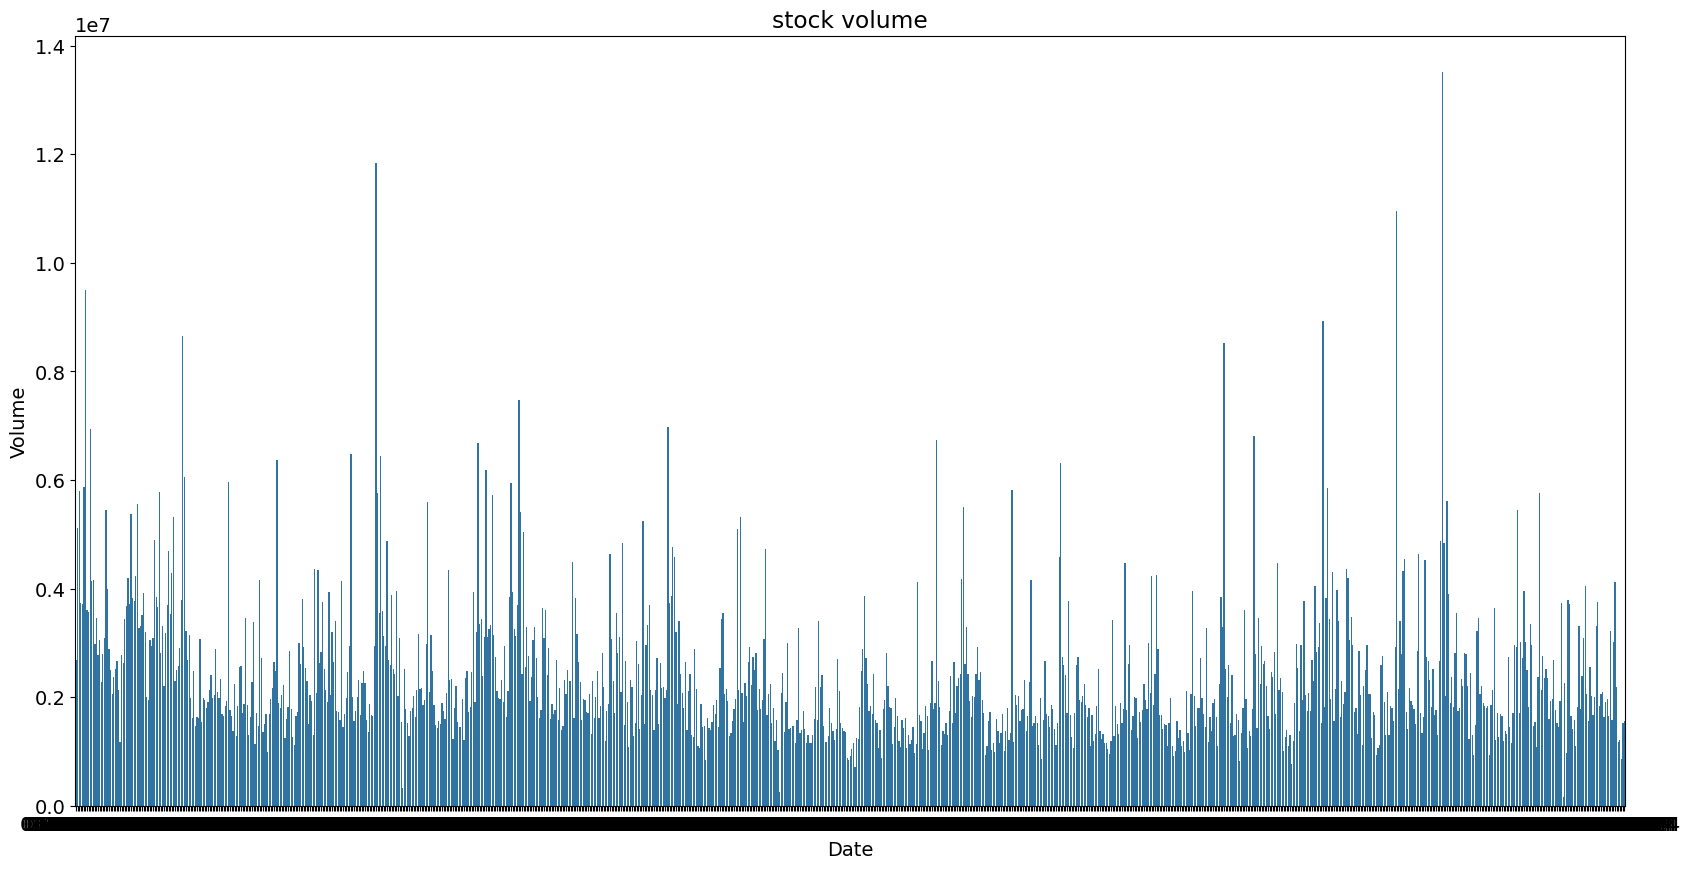

In [292]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df7)
plt.title('stock volume')
plt.show()




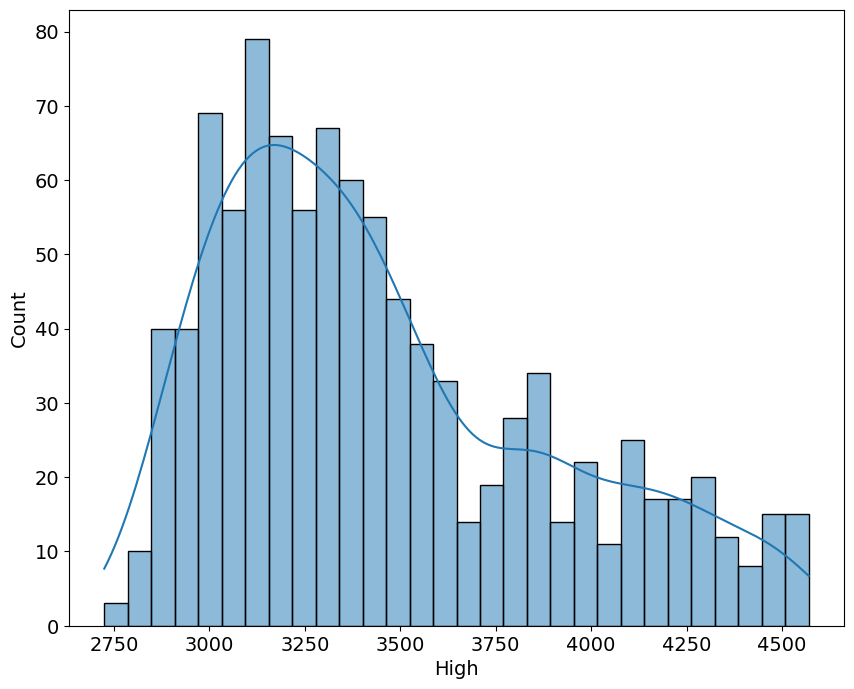

In [294]:
plt.figure(figsize=(10,8))
sns.histplot(df7['High'],bins=30,kde=True)
plt.show()



<Axes: xlabel='Return', ylabel='Count'>

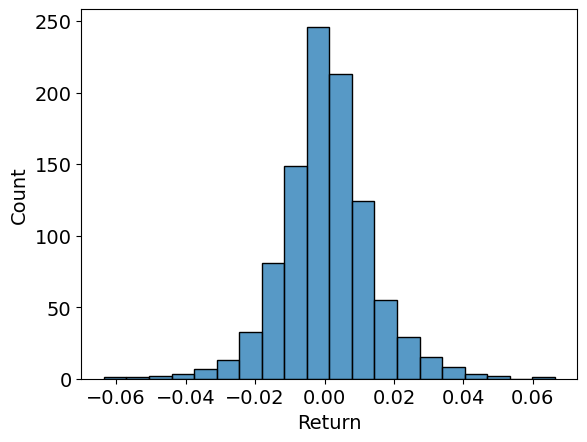

In [296]:
df7['Return']=df7['Close'].pct_change()
sns.histplot(data=df7['Return'],bins=20)



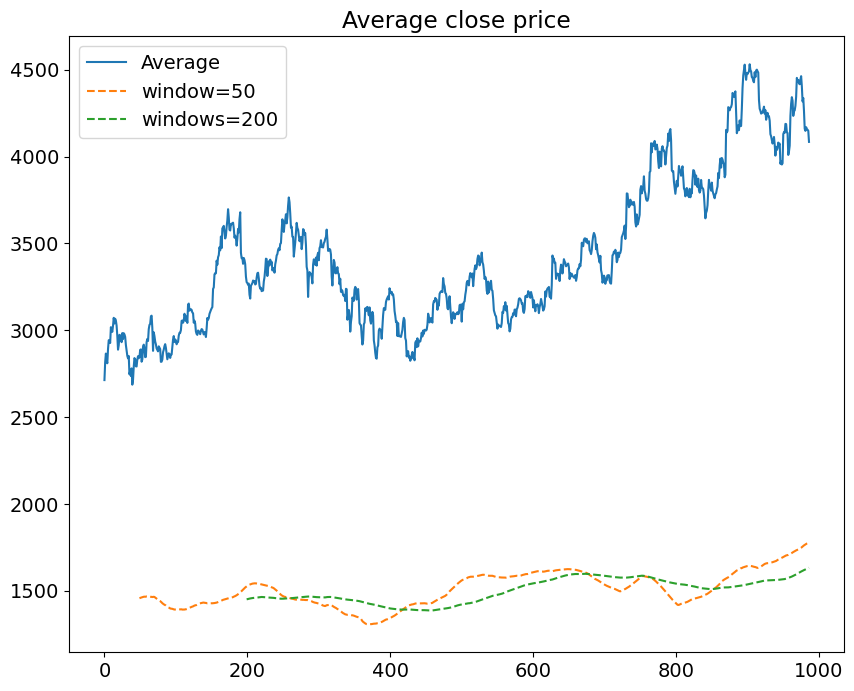

In [298]:
df7['sma'] = df3['Close'].rolling(window=50).mean()
df7['sml'] = df3['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df7['Close'],label='Average')
plt.plot(df7['sma'],label='window=50',linestyle='--')
plt.plot(df7['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()

In [300]:
df7.sort_values(by='Close',ascending=False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
903,30-08-2024,4531.867676,4570.182670,4466.234394,4478.375963,3637222,TCS.NS,0.009298,1643.975005,1539.577462
896,21-08-2024,4529.628906,4538.088062,4470.961981,4496.289882,1896990,TCS.NS,0.006234,1637.914006,1533.294468
895,20-08-2024,4501.564453,4543.064271,4478.376609,4483.352583,2212298,TCS.NS,0.007417,1636.865005,1532.547167
913,13-09-2024,4500.867676,4525.150329,4483.352152,4508.232019,1458786,TCS.NS,0.001085,1633.116001,1548.082783
904,02-09-2024,4499.324707,4565.953185,4490.318390,4554.010849,1216500,TCS.NS,-0.007181,1643.127004,1540.340378
...,...,...,...,...,...,...,...,...,...,...
35,22-02-2021,2746.569336,2874.268216,2732.365058,2874.268216,5366696,TCS.NS,-0.036916,NaN,NaN
37,24-02-2021,2736.959717,2788.252760,2711.939671,2759.147929,3774549,TCS.NS,-0.010771,NaN,NaN
40,01-03-2021,2714.771973,2752.649967,2693.976327,2716.443104,3265871,TCS.NS,0.010331,NaN,NaN
0,01-01-2021,2713.368164,2724.255922,2667.732244,2668.658862,2681440,TCS.NS,NaN,NaN,NaN


In [304]:
mean_val7=df7['Volume'].mean()
print(f"the mean value is {mean_val:.2f}")

the mean value is 4142064.41


In [306]:
#ZOMATO

In [308]:
df8=pd.read_csv(r"C:\Users\umesh\OneDrive\Documents\project da\Zomato_stock_data.csv")
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    850 non-null    object 
 1   Close   850 non-null    float64
 2   High    850 non-null    float64
 3   Low     850 non-null    float64
 4   Open    850 non-null    float64
 5   Volume  850 non-null    int64  
 6   Ticker  850 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 46.6+ KB


In [310]:
df8.drop_duplicates()
df8.dropna()

,Date,Close,High,Low,Open,Volume,Ticker
0,23-07-2021,126.000000,138.899994,115.000000,116.000000,694895290,Zomato
1,26-07-2021,140.649994,143.750000,125.300003,126.349998,249723854,Zomato
2,27-07-2021,132.899994,147.800003,127.750000,141.699997,240341900,Zomato
3,28-07-2021,131.199997,135.000000,123.550003,131.000000,159793731,Zomato
4,29-07-2021,141.550003,144.000000,132.199997,134.949997,117973089,Zomato
...,...,...,...,...,...,...,...
845,24-12-2024,274.850006,277.000000,269.100006,274.500000,37011994,Zomato
846,26-12-2024,273.200012,276.799988,271.250000,276.600006,26031760,Zomato
847,27-12-2024,271.250000,275.899994,269.750000,274.899994,18997843,Zomato
848,30-12-2024,282.100006,291.600006,269.799988,271.250000,143568542,Zomato


In [312]:
# visualization

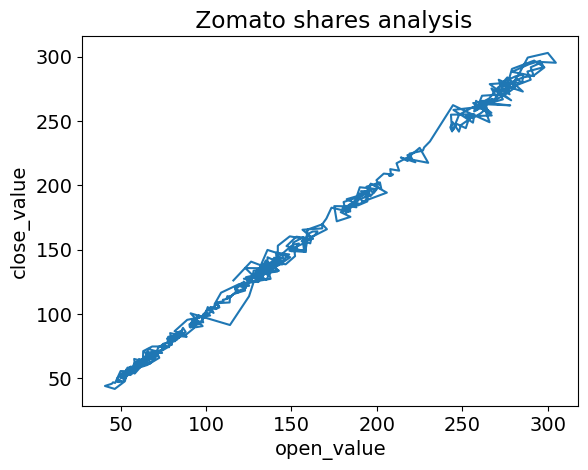

In [316]:
plt.plot(df8['Open'],df8['Close'],label="closing value")
plt.xlabel("open_value")
plt.ylabel("close_value")
plt.title(" Zomato shares analysis")
plt.show()

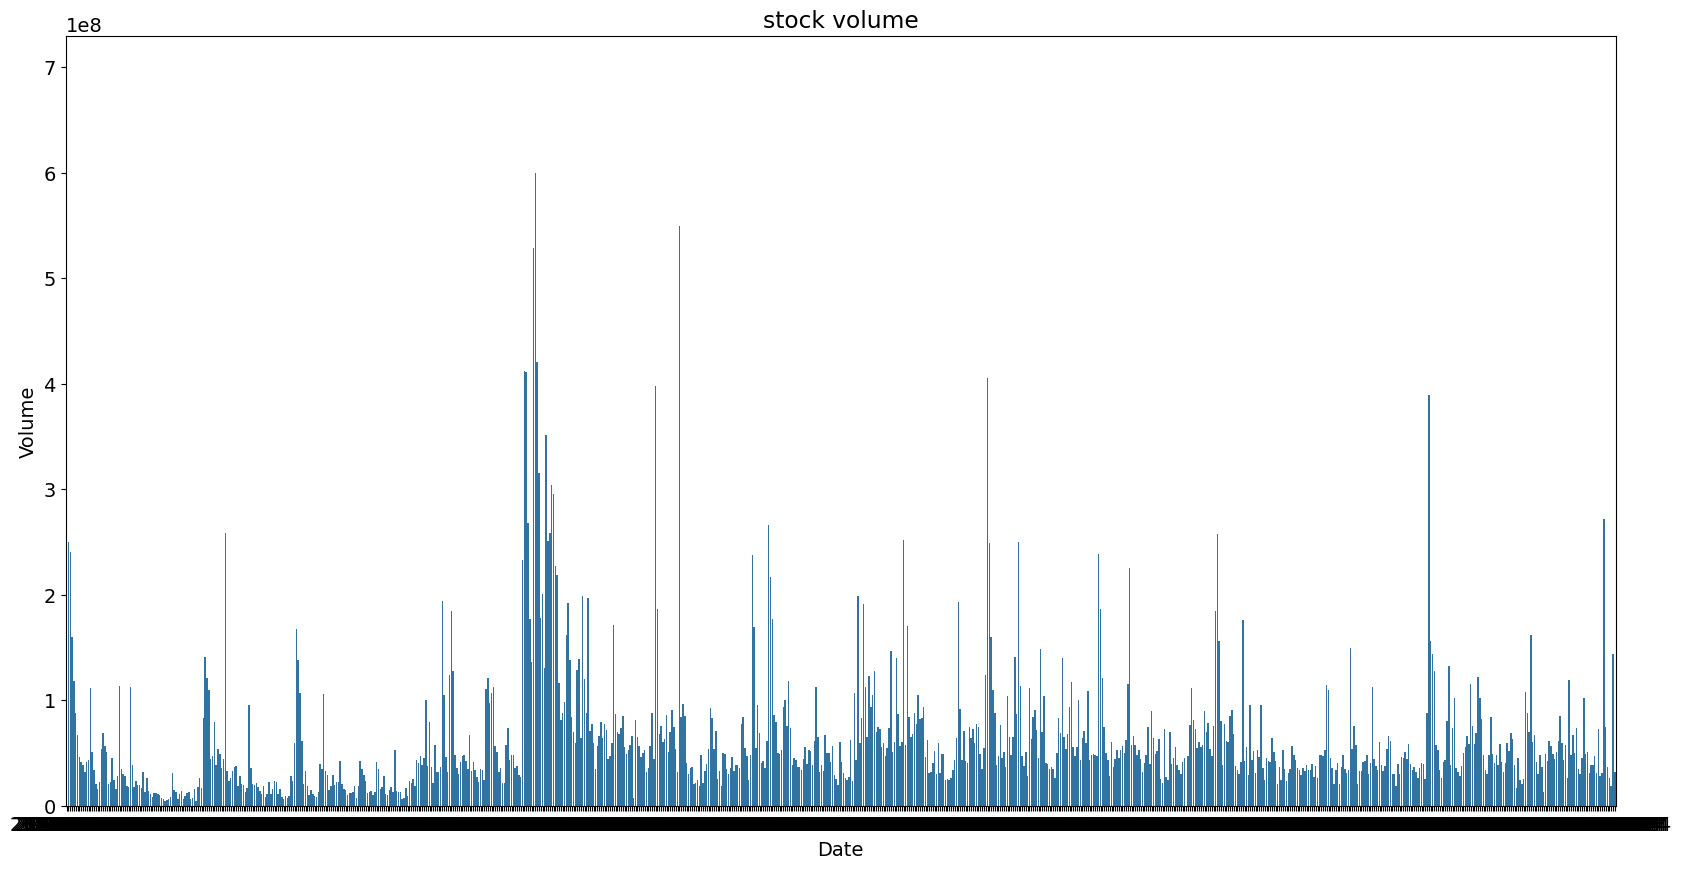

In [318]:
plt.figure(figsize=(20,10))
sns.barplot(x='Date',y='Volume',data=df8)



plt.title('stock volume')

plt.show()

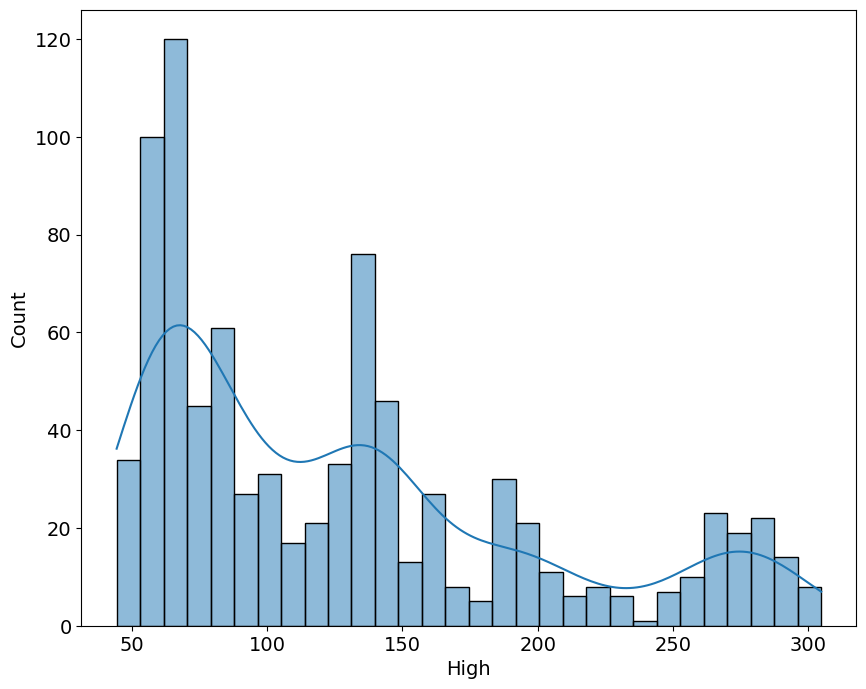

In [320]:



plt.figure(figsize=(10,8))
sns.histplot(df8['High'],bins=30,kde=True)
plt.show()



<Axes: xlabel='Return', ylabel='Count'>

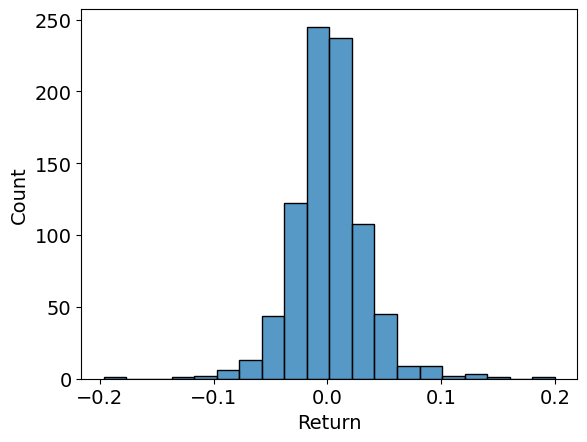

In [322]:
df8['Return']=df8['Close'].pct_change()
sns.histplot(data=df8['Return'],bins=20)


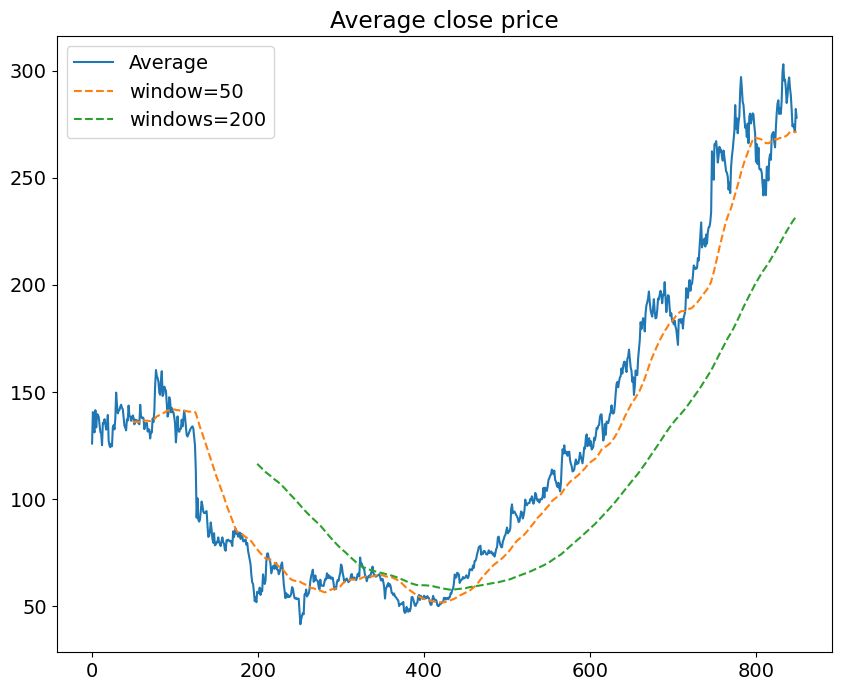

In [324]:
df8['sma'] = df8['Close'].rolling(window=50).mean()
df8['sml'] = df8['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,8))
plt.plot(df8['Close'],label='Average')
plt.plot(df8['sma'],label='window=50',linestyle='--')
plt.plot(df8['sml'],label='windows=200',linestyle='--')
plt.title('Average close price')
plt.legend()
plt.show()

In [326]:
df8.sort_values(by='Close',ascending=False)

,Date,Close,High,Low,Open,Volume,Ticker,Return,sma,sml
833,06-12-2024,302.950012,303.899994,296.250000,300.000000,49309068,Zomato,0.012026,268.765800,222.37125
832,05-12-2024,299.350006,304.649994,286.850006,288.250000,102148528,Zomato,0.045764,268.540800,221.63025
782,23-09-2024,297.000000,298.250000,290.549988,292.000000,48761823,Zomato,0.022375,252.429801,187.12705
840,17-12-2024,296.799988,303.450012,292.299988,295.500000,72724924,Zomato,0.009009,270.922800,227.09100
835,10-12-2024,295.850006,299.450012,295.000000,296.750000,31333039,Zomato,0.001863,269.202800,223.79150
...,...,...,...,...,...,...,...,...,...,...
254,29-07-2022,46.799999,47.200001,44.549999,45.599998,177187972,Zomato,0.024070,60.714000,95.70725
255,01-08-2022,46.299999,47.250000,45.049999,46.799999,135944043,Zomato,-0.010684,60.499000,95.25575
253,28-07-2022,45.700001,46.299999,43.049999,44.900002,267544569,Zomato,0.039818,60.939000,96.15750
252,27-07-2022,43.950001,44.400002,40.599998,40.849998,411205172,Zomato,0.055222,61.132000,96.60975


In [328]:
mean_val8=df8['Volume'].mean()
print(f"the mean value is {mean_val8:.2f}")

the mean value is 64685013.68


In [336]:
# INSIGHTS

#1) THE TCS STOCK ARE HIGH THAN ANY OTHER STOCKS 
#2) THE LEAST PERFOMANCE STOCK IS ZOMATO AND SUFFERRES A LOT IN DEPRECIATION . 
#3) THE KOTAK SHARES FACING A DEPRECIATION AFTER 2021 .